# Анализ изменений пользовательского спроса в сервисе «Яндекс Афиша» в 2024 году

- Автор: Стефашова Людмила


# Цели и задачи проекта


**Цель:** 
    
   Выявить причины и характер изменений в пользовательском спросе на билеты на мероприятия в сервисе «Яндекс Афиша» в 2024 году, с акцентом на сезонные колебания, сдвиги в предпочтениях аудитории и различия в поведении пользователей мобильных и стационарных устройств.

**Задачи:**
- Исследовать динамику пользовательской активности по месяцам и сезонам, включая анализ количества заказов, выручки и стоимости одного билета.
- Оценить влияние сезонности на структуру спроса по типам мероприятий, возрастным категориям и типам устройств.
- Сравнить поведение пользователей мобильных и стационарных устройств, включая частоту заказов и среднюю выручку.
- Определить лидирующие категории мероприятий, регионы и билетные партнёрства по объёму заказов и выручке.
- Проверить статистические гипотезы о различиях в активности пользователей мобильных и стационарных устройств в осенний период.
- Сформулировать выводы и рекомендации для продуктового отдела на основе полученных результатов.

# Структура проекта

**1. Описание данных**

- Источники данных
- Структура датасетов: ключевые столбцы и их описание
- Валюты транзакций (рубли и тенге)

**2. Предобработка данных**

- Загрузка данных и знакомство с ними
- Проверка на пропуски и артефакты
- Обработка аномалий и выбросов
- Проверка на явные и неявные дубликаты
- Преобразование типов данных
- Подготовка итогового датафрейма для анализа
   
**3. Исследовательский анализ данных**

*3.1. Анализ распределения заказов по сегментам и сезонные изменения*

- Динамика количества заказов по месяцам
- Сравнение структуры спроса летом и осенью по:
    - типу мероприятия (`event_type_main`)
    - типу устройства (`device_type_canonical`)
    - возрастному рейтингу (`age_limit`)
- Изменение средней стоимости билета по категориям мероприятий

*3.2. Осенняя активность пользователей (сентябрь–октябрь 2024)*

- Дневная динамика: число заказов, DAU, заказы на пользователя, средняя цена билета
- Анализ недельной цикличности (будни vs выходные)

*3.3. Популярные события и партнёры*

- Распределение мероприятий и заказов по регионам
- Рейтинг билетных партнёров по:
    - количеству уникальных мероприятий
    - числу обработанных заказов
    - суммарной выручке
- Выявление лидеров и оценка их вклада в общие показатели

**4. Статистический анализ**

- Формулировка и проверка гипотез для осеннего периода:
    - Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств
    - Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств
- Обоснование выбора статистических тестов
- Интерпретация результатов

**5. Общий вывод и рекомендации**

- Краткое резюме ключевых находок
- Ответы на исходные вопросы продуктового отдела
- Практические рекомендации по адаптации продукта, маркетингу и работе с партнёрами

## Описание данных

### `final_tickets_orders_df.csv`

**Включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных.** 

*Датасет содержит такие поля:*

- `order_id` — уникальный идентификатор заказа
- `user_id` — уникальный идентификатор пользователя
- `created_dt_msk` — дата создания заказа (московское время)
- `created_ts_msk` — дата и время создания заказа (московское время)
- `event_id` — идентификатор мероприятия
- `cinema_circuit` — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'
- `age_limit` — возрастное ограничение мероприятия
- `currency_code` — валюта оплаты, например rub для российских рублей
- `device_type_canonical` — тип устройства, с которого был оформлен заказ, например `mobile` для мобильных устройств, `desktop` для стационарных
- `revenue` — выручка от заказа
- `service_name` — название билетного оператора
- `tickets_count` — количество купленных билетов
- `total` — общая сумма заказа
- `days_since_prev` - количество дней с предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск

### `final_tickets_events_df.csv`

**Cодержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия.** 

*Датасет содержит такие поля:*

- `event_id` — уникальный идентификатор мероприятия
- `event_name` — название мероприятия
- `event_type_description` — описание типа мероприятия
- `event_type_main` — основной тип мероприятия: театральная постановка, концерт и так далее
- `organizers` — организаторы мероприятия
- `region_name` — название региона
- `city_name` — название города
- `venue_id` — уникальный идентификатор площадки
- `venue_name` — название площадки
- `venue_address` — адрес площадки

### `final_tickets_tenge_df.csv`

**Содержит информацию о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге.**

*Датасет содержит такие поля:*

- `nominal` — номинал (100 тенге)
- `data` — дата
- `curs` — курс тенге к рублю
- `cdx` — обозначение валюты (kzt)


## Предобработка данных

### Загрузка данных и знакомство с ними

- Импортируем необходимые библиотеки

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

- Загружаем данные обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных из файла `final_tickets_orders_df.csv`.

In [2]:
# Выгружаем данные в датафрейм
orders = pd.read_csv('final_tickets_orders_df.csv')

In [3]:
# Выводим первые строки датафрейма на экран
orders.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [4]:
# Выводим информацию о датафрейме
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

Датасет содержит 290 849 записей о заказах билетов на мероприятия в сервисе «Яндекс Афиша» за 2024 год.

Все ключевые поля заполнены полностью, кроме столбца `days_since_prev`, который содержит 21 940 пропусков (≈7.5% данных) — это ожидаемо, так как для первых заказов пользователей интервал с предыдущим заказом не определён.

*Основные наблюдения:*

- Данные представлены в двух валютах: `rub` и `kzt`
- Столбцы с датой (`created_dt_msk`, `created_ts_msk`) хранятся как строки — необходимо преобразование в `datetime`.
- Столбец `age_limit` представлен как целое число (0, 16, 18 и т.д.), что соответствует возрастному рейтингу.

Данные в целом полные и структурированные, пригодны для дальнейшей предобработки и анализа.

- Загружаем данные о событиях из файла `final_tickets_events_df.csv`

In [5]:
# Выгружаем данные в датафрейм
events = pd.read_csv('final_tickets_events_df.csv')

In [6]:
# Выводим первые строки датафрейма на экран
events.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [7]:
# Выводим информацию о датафрейме
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


Датасет содержит информацию о 22 427 уникальных мероприятиях, каждое из которых идентифицировано по `event_id`. 

Все столбцы заполнены полностью — пропусков нет.

*Ключевые особенности:*

- Структура данных включает как описательные поля (`event_name`, `venue_address`), так и категориальные признаки (`event_type_main`, `region_name`, `organizers` и др.).
- Поле `event_name` содержит закодированные названия мероприятий по причине анонимизации данных.
- Присутствует географическая привязка: регион, город, площадка — что позволит проводить региональный анализ.

Данные готовы к объединению с основным датасетом заказов по `event_id` и последующему анализу популярности событий, регионов и организаторов.

- Загружаем данные о курсе тенге к российскому рублю за 2024 год из файла `final_tickets_tenge_df.csv`

In [8]:
# Выгружаем данные в датафрейм
tenge = pd.read_csv('final_tickets_tenge_df.csv')

In [9]:
# Выводим первые строки датафрейма на экран
tenge.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [10]:
# Выводим информацию о датафрейме
tenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


Датасет содержит 357 записей с курсами казахстанского тенге (KZT) к российскому рублю (RUB) за 2024 год. 

Все столбцы заполнены полностью — пропусков нет.

*Ключевые особенности:*

- Столбец `data` хранит дату курса (в формате строки, потребует преобразования в `datetime`).
- `nominal` всегда равен 100, что означает: курс указан за 100 тенге.
- `curs` — значение курса в рублях (например, 19.94 руб. за 100 KZT).
- `cdx` фиксировано как `kzt`, подтверждая, что данные относятся к тенге.

Данные пригодны для конвертации выручки из тенге в рубли по дате заказа и будут использованы для унификации валюты в основном датасете.

### Проверка на пропуски и артефакты

#### На предыдущем шаге мы выяснили что все ключевые столбцы заполнены. Обработка пропусков не требуется.


#### Проведем проверку на артефакты

**Ключевые категориальные столбцы в `orders`:**

- `cinema_circuit`
- `currency_code`
- `device_type_canonical`
- `service_name`

In [11]:
# Выведем уникальные значения в cinema_circuit
display(orders['cinema_circuit'].value_counts(dropna=False))

нет           289451
Другое          1261
КиноСити         122
Москино            7
Киномакс           7
ЦентрФильм         1
Name: cinema_circuit, dtype: int64

- Значение `нет`(большинство) означает, что мероприятие не связано с кинотеатром (например, театр, концерт, фестиваль).
- `Другое` — вероятно, тоже нестандартные или непрофильные площадки.
- Остальные 136 записей — реальные кинотеатральные сети.

*Вывод:*

Значения корректны, `нет` — это не ошибка, а осмысленная категория, обозначающая отсутствие привязки к кинотеатральной сети.

In [12]:
# Выведем уникальные значения в currency_code
display(orders['currency_code'].value_counts(dropna=False))

rub    285780
kzt      5069
Name: currency_code, dtype: int64

- В данных присутствуют только две валюты — российский рубль (rub) и казахстанский тенге (kzt).
- Пропусков нет, опечаток или артефактов не обнаружено.
- Распределение соответствует ожиданиям (основной рынок — Россия, частично — Казахстан).

In [13]:
# Выведем уникальные значения в device_type_canonical
display(orders['device_type_canonical'].value_counts(dropna=False))

mobile     232679
desktop     58170
Name: device_type_canonical, dtype: int64

Уникальные значения:

- `mobile` — 232 679 заказов (80.0%)
- `desktop` — 58 170 заказов (20.0%)

- В данных присутствуют два корректных типа устройств — мобильные и стационарные.
- Пропусков нет, артефактов не обнаружено.
- Распределение логичное: большинство пользователей бронируют через мобильные устройства.

In [14]:
# Выведем уникальные значения в service_name
display(orders['service_name'].value_counts(dropna=False))

Билеты без проблем        63709
Лови билет!               41126
Билеты в руки             40364
Мой билет                 34843
Облачко                   26642
Лучшие билеты             17795
Весь в билетах            16849
Прачечная                 10273
Край билетов               6207
Тебе билет!                5228
Яблоко                     5039
Дом культуры               4502
За билетом!                2865
Городской дом культуры     2733
Show_ticket                2200
Мир касс                   2167
Быстробилет                2003
Выступления.ру             1616
Восьмёрка                  1118
Crazy ticket!               790
Росбилет                    539
Шоу начинается!             499
Быстрый кассир              381
Радио ticket                376
Телебилет                   321
КарандашРУ                  133
Реестр                      125
Билет по телефону            85
Вперёд!                      80
Дырокол                      74
Кино билет                   67
Цвет и б

Ключевые наблюдения:

- Всего 35 уникальных партнёров.
- Распределение сильно скошено влево: топ-3 партнёра ('Билеты без проблем', 'Лови билет!', 'Билеты в руки') составляют ~48% всех заказов.
- Все значения выглядят как осмысленные названия, без явных артефактов ('не указано', 'unknown', пустых строк, 'nan' и т.п.).
- Есть как русскоязычные названия, так и немного англоязычных ('Show_ticket', 'Crazy ticket!'), но это часть брендинга — не ошибка.

Вывод:
- Поле корректно заполнено, пропусков нет, все значения — валидные названия партнёров.
- Нормализация не требуется, так как каждое название — уникальный идентификатор партнёра, и изменение регистра или формата может нарушить идентификацию.

**Ключевые категориальные столбцы в `events`:**

- `event_type_main`
- `organizers`
- `region_name`
- `city_name`
- `venue_name`

In [15]:
# Выведем уникальные значения в event_type_main
display(events['event_type_main'].value_counts(dropna=False))

концерты    8680
театр       7076
другое      4658
спорт        872
стендап      636
выставки     290
ёлки         215
Name: event_type_main, dtype: int64

- Все категории корректны и осмысленны: 
    - концерты (8 680)
    - театр (7 076)
    - спорт
    - стендап
    - выставки и др.
- Категория «другое» составляет ~20% (4 658 событий) — это значимая доля, отражающая разнообразие афиши.
- Поскольку «другое» объединяет события, не попавшие в основные типы (например, фестивали, лекции, шоу), удалять или переименовывать её нецелесообразно — это валидная бизнес-категория.

In [16]:
# Выведем уникальные значения в organizers
display(events['organizers'].value_counts(dropna=False))

№1874    121
№1659    120
№5024    117
№1738    117
№3529    113
        ... 
№4114      1
№3243      1
№4990      1
№2297      1
№2745      1
Name: organizers, Length: 4293, dtype: int64

In [17]:
# Проверим на нестандартные значения
non_standard = ~events['organizers'].str.match(r'^№\d+$')
if non_standard.any():
    print("Найдены нестандартные организаторы:")
    print(events.loc[non_standard, 'organizers'].unique())
else:
    print("Все организаторы в формате '№XXXX'")

Все организаторы в формате '№XXXX'


- 4 293 уникальных организатора (из 22 427 событий)
- Все значения строго в формате '№XXXX' — единообразие соблюдено.
- Топ-организаторы: '№1874' (121 событие), '№1659' (120) 

*Решение:*

- Оставить как есть — данные готовы к анализу.
- При агрегации будем использовать этот столбец напрямую для выявления топ-партнёров.

In [18]:
# Выведем уникальные значения в region_name
display(events['region_name'].value_counts(dropna=False))

Каменевский регион          5983
Североярская область        3814
Широковская область         1233
Светополянский округ        1075
Речиновская область          702
                            ... 
Теплоозёрский округ            2
Верхозёрский край              2
Сосноводолинская область       2
Лесноярский край               2
Светолесский край              2
Name: region_name, Length: 81, dtype: int64

In [19]:
# Найдем значения, которые могут означать "нет данных"
artefacts = ['нет', 'не указано', 'n/a', 'unknown', 'null', '–', '-', '']
suspect_values = events['region_name'].str.lower().isin([a.lower() for a in artefacts])
print(f"Подозрительных значений: {suspect_values.sum()}")

Подозрительных значений: 0


In [20]:
# Сравнивним исходное и "очищенное" количество уникальных значений
cleaned = events['region_name'].str.strip().str.lower()
if events['region_name'].nunique() != cleaned.nunique():
    print("Есть различия в регистре или пробелах!")
    # Выводим примеры, если есть:
    diff = events['region_name'][events['region_name'].str.strip().str.lower() != events['region_name']]
    print("Примеры:", diff.head().tolist())

- 81 уникальный регион.
- Топ-регионы:
    - `Каменевский регион` — 5 983
    - `Североярская область` — 3 814
    - Остальные — значительно меньше.

- Нет артефактов, все названия — валидные географические сущности.
- Распределение сильно неравномерное: топ-2 региона = ~43% всех событий.

*Решение:*

- Оставить без изменений.


In [21]:
# Выведем уникальные значения в city_name
display(events['city_name'].value_counts(dropna=False))

Глиногорск      5778
Озёрск          3806
Глиноград        817
Дальнесветск     702
Радужнополье     695
                ... 
Златополье         1
Серебровка         1
Ручейницк          1
Мироград           1
Медвежанск         1
Name: city_name, Length: 352, dtype: int64

In [22]:
# Найдем значения, которые могут означать "нет данных"
suspect_values = events['city_name'].str.lower().isin([a.lower() for a in artefacts])
print(f"Подозрительных значений: {suspect_values.sum()}")

Подозрительных значений: 0


In [23]:
# Сравнивним исходное и "очищенное" количество уникальных значений
cleaned = events['city_name'].str.strip().str.lower()
if events['city_name'].nunique() != cleaned.nunique():
    print("Есть различия в регистре или пробелах!")
    # Выводим примеры, если есть:
    diff = events['city_name'][events['city_name'].str.strip().str.lower() != events['city_name']]
    print("Примеры:", diff.head().tolist())

- 352 уникальных города.
- Топ-города:
    - `Глиногорск` — 5 778
    - `Озёрск` — 3 806
    - Остальные — резко меньше.
- Аналогично регионам — сильная концентрация в двух городах.
- Много городов с 1–2 событиями.

*Решение:*
- Оставить как есть.
- Для агрегации — использовать как есть или создать группу 'другие города' при визуализации.

In [24]:
# Выведем уникальные значения в venue_name
display(events['venue_name'].value_counts(dropna=False))

Дворец культуры "Скворечник" Инк                 313
Фестивальный проект "Листья" Групп               281
Творческое объединение "Гармония" Инк            188
Совет искусства "Шар" и партнеры                 167
Центр культурного наследия "Заряд" и партнеры    158
                                                ... 
Литературный музей "Симфония" и партнеры           1
Арт-кафе "Секунда" Лимитед                         1
Фестивальный проект "Стена" Инкорпорэйтед          1
Фонд искусств "Мотив" Инк                          1
Архив "Светляк" Инкорпорэйтед                      1
Name: venue_name, Length: 3217, dtype: int64

In [25]:
# Найдем значения, которые могут означать "нет данных"
suspect_values = events['venue_name'].str.lower().isin([a.lower() for a in artefacts])
print(f"Подозрительных значений: {suspect_values.sum()}")

Подозрительных значений: 0


In [26]:
# Сравнивним исходное и "очищенное" количество уникальных значений
cleaned = events['venue_name'].str.strip().str.lower()
if events['venue_name'].nunique() != cleaned.nunique():
    print("Есть различия в регистре или пробелах!")
    # Выводим примеры, если есть:
    diff = events['venue_name'][events['venue_name'].str.strip().str.lower() != events['venue_name']]
    print("Примеры:", diff.head().tolist())

- 3 217 уникальных площадок (из 22 427 событий)
- Топ-площадки:
    - Дворец культуры "Скворечник" Инк — 313
    - Фестивальный проект "Листья" Групп — 281
    - Множество площадок с 1 событием.
- Названия уникальны, без артефактов.
- Высокая фрагментация — типично для культурных событий.

*Решение:*
- Оставить без изменений.
- При анализе партнёров и площадок будем использовать топ-N.

**Общий вывод:**

- Все категориальные поля заполнены полностью, не содержат пропусков или артефактов, и готовы к использованию в анализе.


### Обработка аномалий и выбросов

**Выполним анализ количественных переменных в основном датафрейме `orders`,** с фокусом на:

- `revenue` — выручка с заказа. 
С учётом двух валют: `rub` и `kzt`.
- `tickets_count` — количество билетов в заказе

#### Анализ выручки

In [27]:
# Разделим данные по валюте
rub_data = orders[orders['currency_code'] == 'rub'].copy()
kzt_data = orders[orders['currency_code'] == 'kzt'].copy()

print(f"Заказов в рублях (RUB): {len(rub_data):,}")
print(f"Заказов в тенге (KZT): {len(kzt_data):,}")

Заказов в рублях (RUB): 285,780
Заказов в тенге (KZT): 5,069


In [28]:
# Выведем статистику по revenue в рублях
display(rub_data['revenue'].describe())

count    285780.000000
mean        547.568333
std         871.524559
min         -90.760000
25%         113.827500
50%         346.100000
75%         791.700000
max       81174.540000
Name: revenue, dtype: float64

In [29]:
# Выведем статистику по revenue в тенге
display(kzt_data['revenue'].describe())

count     5069.000000
mean      4995.206767
std       4916.752776
min          0.000000
25%        518.100000
50%       3698.830000
75%       7397.660000
max      26425.860000
Name: revenue, dtype: float64

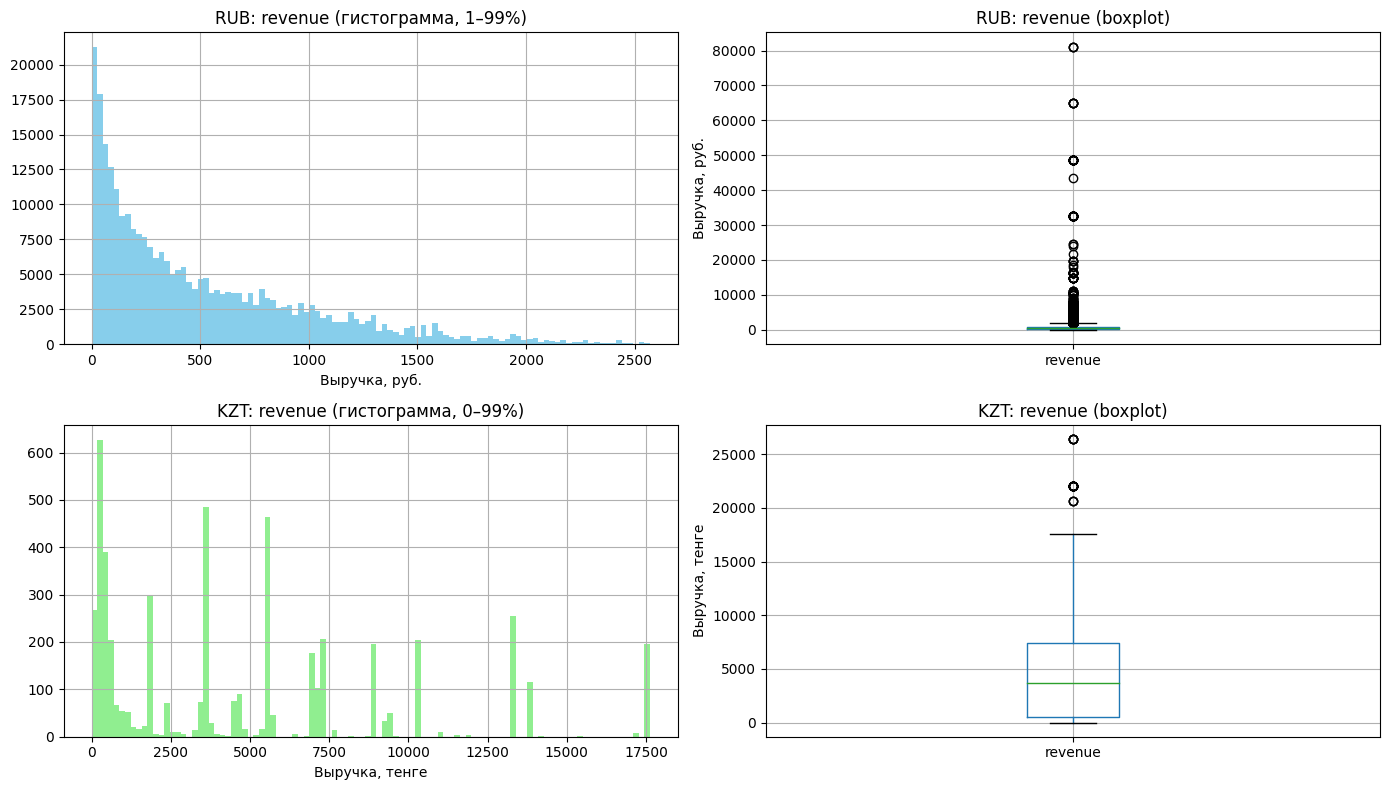

In [30]:
# Постоим графики до обработки данных для визуализации 
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# RUB — гистограмма
rub_data['revenue'].hist(bins=100, ax=axes[0,0], color='skyblue', range=(rub_data['revenue'].quantile(0.01), rub_data['revenue'].quantile(0.99)))
axes[0,0].set_title('RUB: revenue (гистограмма, 1–99%)')
axes[0,0].set_xlabel('Выручка, руб.')

# RUB — boxplot
rub_data.boxplot(column='revenue', ax=axes[0,1])
axes[0,1].set_title('RUB: revenue (boxplot)')
axes[0,1].set_ylabel('Выручка, руб.')

# KZT — гистограмма
kzt_data['revenue'].hist(bins=100, ax=axes[1,0], color='lightgreen', range=(0, kzt_data['revenue'].quantile(0.99)))
axes[1,0].set_title('KZT: revenue (гистограмма, 0–99%)')
axes[1,0].set_xlabel('Выручка, тенге')

# KZT — boxplot
kzt_data.boxplot(column='revenue', ax=axes[1,1])
axes[1,1].set_title('KZT: revenue (boxplot)')
axes[1,1].set_ylabel('Выручка, тенге')

plt.tight_layout()
plt.show()

**Анализ `revenue` по валютам**

1. Рублёвые заказы (rub)
    - Минимум: -90.76 руб. (Отрицательная выручка!!!)
    - Максимум: 81 174.54 руб.
    - Стандартное отклонение (871) >> среднее (547) → сильная асимметрия, много выбросов


2. Заказы в тенге (kzt)
    - Минимум: 0.00 (Нулевая выручка — подозрительно, но может быть (например, бесплатное мероприятие с комиссией 0))
    - Максимум: 26 425.86 тенге
    - Распределение более умеренное, но также с длинным правым хвостом.

In [31]:
# Проверим заказы с отрицательной выручкой
neg_rub = rub_data[rub_data['revenue'] < 0]
print(f"Количество заказов с отрицательной выручкой (RUB): {len(neg_rub)}")
print(f"Доля от всех рублёвых заказов: {len(neg_rub) / len(rub_data) * 100:.4f}%")

Количество заказов с отрицательной выручкой (RUB): 381
Доля от всех рублёвых заказов: 0.1333%


In [32]:
print("\nПримеры отрицательных значений:")
display(neg_rub[['order_id', 'user_id', 'revenue', 'tickets_count', 'created_dt_msk']].head(10))


Примеры отрицательных значений:


,order_id,user_id,revenue,tickets_count,created_dt_msk
264,1594653,00eb3dc9baa1543,-2.37,3,2024-06-29
4540,2360920,02ea4583333f064,-0.23,3,2024-09-03
4562,2361094,02ea4583333f064,-0.15,2,2024-09-04
8155,166809,043f669c9f734b1,-0.62,1,2024-09-27
8156,166780,043f669c9f734b1,-1.86,3,2024-09-27
11360,6620527,06727636bf2f465,-1.58,2,2024-06-30
11361,6620498,06727636bf2f465,-1.58,2,2024-07-01
11585,8333963,067494310c6617f,-6.18,4,2024-10-07
11637,8350029,067494310c6617f,-10.77,3,2024-10-24
11638,4930755,067494310c6617f,-3.59,1,2024-10-24


In [33]:
print("\nСтатистика по отрицательной выручке:")
display(neg_rub['revenue'].describe())


Статистика по отрицательной выручке:


count    381.000000
mean      -2.492362
std        5.065072
min      -90.760000
25%       -3.450000
50%       -1.580000
75%       -0.650000
max       -0.010000
Name: revenue, dtype: float64

*Анализ отрицательной выручки в рублях*

- Количество: 381 заказ
- Доля: 0.1333% от всех рублёвых заказов (менее 0.2%)
- Подавляющее большинство — небольшие по модулю (медиана = -1.58 руб.)
- Только 1 заказ с сильным выбросом: -90.76 руб.
- Остальные — от -0.01 до -10 руб.

Такие значения не являются реальной выручкой, а, скорее всего, отражают:

- Корректировки (например, возврат части суммы за частичную отмену билетов)
- Ошибки расчёта комиссии
- Технические артефакты (тестовые транзакции, бухгалтерские проводки)

В контексте анализа средней выручки с заказа и с билета эти значения:

- Искажают средние метрики вниз
- Не отражают реальное поведение пользователей
- Не соответствуют бизнес-логике «выручка = доход от продажи»

Решение

- Необходимо удалить все 381 заказ с отрицательной выручкой в рублях

Обоснование:

- Доля мала (0.13%) - не повлияет на общую картину
- Значения некорректны для анализа спроса и среднего чека

**Проверим так же количество нулевых значений**


In [34]:
# Проверим заказы с нулевой выручкой
zero_rub = rub_data[rub_data['revenue'] == 0]
print(f"Заказов с revenue = 0 (RUB): {len(zero_rub)}")
print(f"Доля от всех рублёвых заказов: {len(zero_rub) / len(rub_data) * 100:.4f}%")
zero_kzt = kzt_data[kzt_data['revenue'] == 0]
print(f"Заказов с revenue = 0 (kzt): {len(zero_kzt)}")
print(f"Доля от всех заказов в тенге: {len(zero_kzt) / len(kzt_data) * 100:.4f}%")

Заказов с revenue = 0 (RUB): 5731
Доля от всех рублёвых заказов: 2.0054%
Заказов с revenue = 0 (kzt): 6
Доля от всех заказов в тенге: 0.1184%


**Принимаем решение удалить отрицательные и нулевые заказы**

Потому что:

- Доля небольшая:
    - В RUB — 2.13% (заметно, но не критично),
    - В KZT — 0.12% (незначительно).
- Проект направлен на анализ изменений в пользовательском спросе с точки зрения выручки.
- Заказы с нулевой или отрицательной выручкой не вносят вклад в доход и искажают ключевые метрики (средний чек, выручка с билета).
- Их удаление (2.25% данных) — обоснованная предобработка, соответствующая целям исследования. 

In [35]:
# Удаляем заказы с revenue <= 0 (и RUB, и KZT)
rub_clean = rub_data[rub_data['revenue'] > 0]
kzt_clean = kzt_data[kzt_data['revenue'] > 0]

print(f"Очищено RUB: {len(rub_data) - len(rub_clean)} заказов")
print(f"Очищено KZT: {len(kzt_data) - len(kzt_clean)} заказов")

Очищено RUB: 6112 заказов
Очищено KZT: 6 заказов


**Теперь расчитаем 99-й процентиль и отфильтруем выбросы**

In [36]:
# Рассчитываем 99-й процентиль отдельно для каждой валюты
p99_rub = rub_clean['revenue'].quantile(0.99)
p99_kzt = kzt_clean['revenue'].quantile(0.99)

print(f"99-й percentile revenue (RUB): {p99_rub:,.2f} руб.")
print(f"99-й percentile revenue (KZT): {p99_kzt:,.2f} тенге")

99-й percentile revenue (RUB): 2,574.32 руб.
99-й percentile revenue (KZT): 17,617.24 тенге


In [37]:
# Отфильтруем выбросы (оставляем ≤ 99%)
# Применяем фильтр
rub_filtered = rub_clean[rub_clean['revenue'] <= p99_rub]
kzt_filtered = kzt_clean[kzt_clean['revenue'] <= p99_kzt]

# Сколько удалено?
removed_rub = len(rub_clean) - len(rub_filtered)
removed_kzt = len(kzt_clean) - len(kzt_filtered)

print(f"\nУдалено как выбросы:")
print(f"  - В RUB: {removed_rub:,} заказов ({removed_rub / len(rub_clean) * 100:.2f}%)")
print(f"  - В KZT: {removed_kzt:,} заказов ({removed_kzt / len(kzt_clean) * 100:.2f}%)")


Удалено как выбросы:
  - В RUB: 2,796 заказов (1.00%)
  - В KZT: 29 заказов (0.57%)


In [38]:
# Объединяем и сохраняем финальный датасет
orders_final = pd.concat([rub_filtered, kzt_filtered], ignore_index=True)

print(f"\nИтог:")
print(f"Исходных заказов: {len(orders):,}")
print(f"После удаления revenue <= 0: {len(rub_clean) + len(kzt_clean):,}")
print(f"После фильтрации по 99%: {len(orders_final):,}")
print(f"Всего удалено: {len(orders) - len(orders_final):,} ({(len(orders) - len(orders_final)) / len(orders) * 100:.2f}%)")


Итог:
Исходных заказов: 290,849
После удаления revenue <= 0: 284,731
После фильтрации по 99%: 281,906
Всего удалено: 8,943 (3.07%)


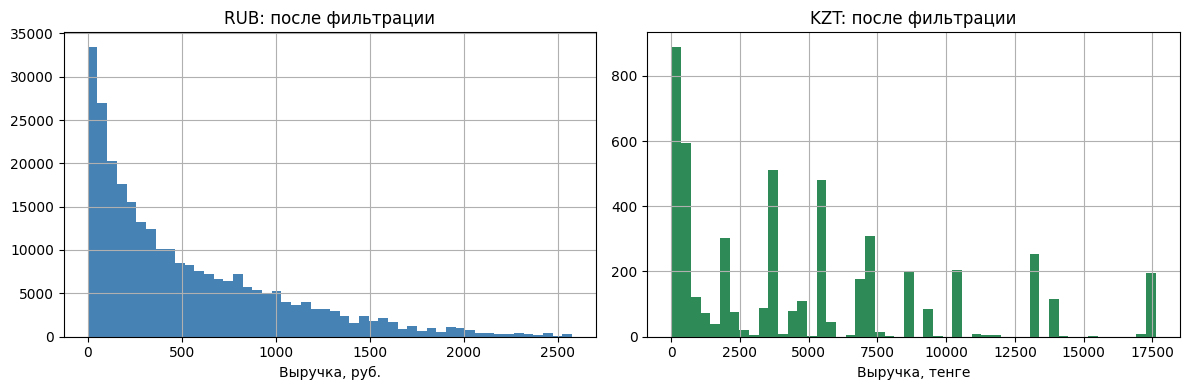

In [39]:
# Проверим распределение после фильтрации
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

orders_final[orders_final['currency_code'] == 'rub']['revenue'].hist(bins=50, ax=ax[0], color='steelblue')
ax[0].set_title('RUB: после фильтрации')
ax[0].set_xlabel('Выручка, руб.')

orders_final[orders_final['currency_code'] == 'kzt']['revenue'].hist(bins=50, ax=ax[1], color='seagreen')
ax[1].set_title('KZT: после фильтрации')
ax[1].set_xlabel('Выручка, тенге')

plt.tight_layout()
plt.show()

**Выявленные проблемы**

- Некорректные значения выручки
    - Отрицательная выручка в RUB: 
        - 381 заказ (–90.76 → –0.01 руб.) — технические артефакты, не отражающие реальный доход
    - Нулевая выручка:
        - 5 731 заказ в RUB (2.01%)
        - 6 заказов в KZT (0.12%)

Такие заказы не генерируют доход и искажают средние метрики.

- Статистические выбросы
    - Распределение сильно скошено вправо (std >> mean),
    - Boxplot и гистограммы подтвердили наличие множества экстремальных значений:
        - RUB: до 81 174 руб.
        - KZT: до 26 425 тенге.
        
**Принятые меры**

- Удалены все заказы с `revenue` <= 0:
    - Всего 6 118 заказов (2.10% от исходных данных)

*Обоснование:* такие заказы не отражают коммерческий спрос.

- Фильтрация по 99-му процентилю отдельно для каждой валюты:
    - RUB: удалено 2 796 заказов (≤ 2 574.32 руб.)
    - KZT: удалено 29 заказов (≤ 17 617.24 тенге)

Это устранило верхние 1% экстремальных значений, искажающих средний чек.
 
**Итоги обработки**

- Исходные данные - 290 849 (100%)
- После удаления revenue <= 0 - 6 118 (–2.10%)
- После фильтрации по 99% - 2 825 (–0.97%)
- Всего удалено - 8 943 (3.07%)

Удаление менее 4% данных — обоснованная предобработка, соответствующая цели проекта:
анализ пользовательского спроса с точки зрения выручки. 

**Заключение**

- Данные по выручке очищены от аномалий и выбросов, что обеспечивает:
    - Корректность расчёта среднего чека
    - Адекватность сравнения между валютами
    - Надёжность последующего анализа по сезонам, регионам и партнёрам


#### Анализ данных по количетсву билетов

In [40]:
# Выведем статистику по количеству билетов (все валюты)
display(orders_final['tickets_count'].describe())

count    281906.000000
mean          2.743865
std           1.156616
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max          47.000000
Name: tickets_count, dtype: float64

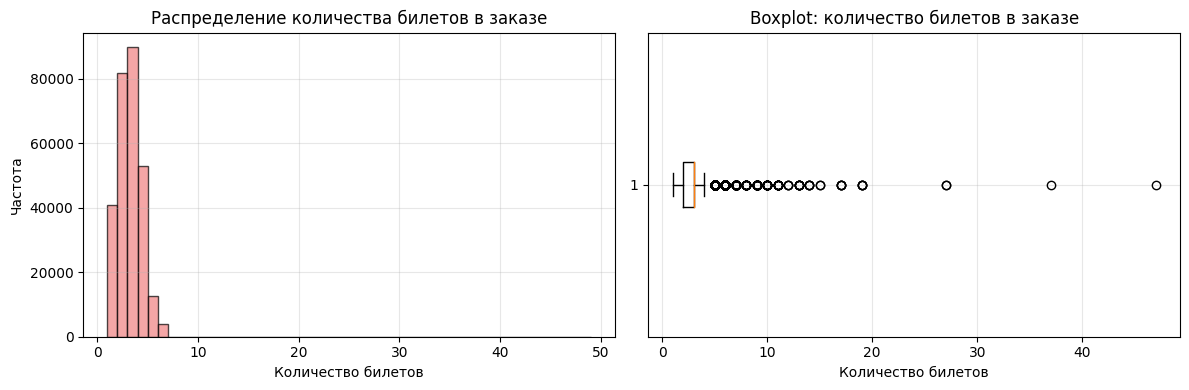

In [41]:
# Построим графики распределения количества билетов
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Гистограмма
axes[0].hist(orders_final['tickets_count'], bins=range(1, 50), edgecolor='black', color='lightcoral', alpha=0.7)
axes[0].set_title('Распределение количества билетов в заказе')
axes[0].set_xlabel('Количество билетов')
axes[0].set_ylabel('Частота')
axes[0].grid(True, alpha=0.3)

# Boxplot
axes[1].boxplot(orders_final['tickets_count'], vert=False)
axes[1].set_title('Boxplot: количество билетов в заказе')
axes[1].set_xlabel('Количество билетов')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [42]:
# Проведём детальный анализ выбросов
q1 = orders_final['tickets_count'].quantile(0.25)
q3 = orders_final['tickets_count'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")
print(f"Нижняя граница: {lower_bound:.2f}")
print(f"Верхняя граница: {upper_bound:.2f}")

Q1: 2.0
Q3: 3.0
IQR: 1.0
Нижняя граница: 0.50
Верхняя граница: 4.50


In [43]:
# Посчитаем количетсво и долю выбросов
outliers_tickets = orders_final[orders_final['tickets_count'] > upper_bound]
print(f"Количество выбросов (tickets_count > {upper_bound:.2f}): {len(outliers_tickets)}")
print(f"Доля от всех заказов: {len(outliers_tickets) / len(orders_final) * 100:.2f}%")

Количество выбросов (tickets_count > 4.50): 16778
Доля от всех заказов: 5.95%


In [44]:
# Выведем уникальные значения в выбросах
display(outliers_tickets['tickets_count'].value_counts().sort_index())

5     12721
6      3883
7        58
8        18
9        38
10       19
11       13
12        3
13        7
14        4
15        2
17        4
19        4
27        2
37        1
47        1
Name: tickets_count, dtype: int64

In [45]:
# Расчитаем 99-й процентиль
p99_tickets = orders_final['tickets_count'].quantile(0.99)
print(f"99-й процентиль количества билетов: {p99_tickets}")

99-й процентиль количества билетов: 6.0


In [46]:
# Посмотрим, сколько заказов выше 99-го процентиля
above_p99 = orders_final[orders_final['tickets_count'] > p99_tickets]
print(f"Заказов выше 99-го процентиля (tickets_count > {p99_tickets}): {len(above_p99)}")
print(f"Доля: {len(above_p99) / len(orders_final) * 100:.3f}%")

Заказов выше 99-го процентиля (tickets_count > 6.0): 174
Доля: 0.062%


In [47]:
# Выведем самые крупные заказы
print("Топ-10 самых крупных заказов по числу билетов:")
display(orders_final.nlargest(10, 'tickets_count')[['order_id', 'user_id', 'tickets_count', 'revenue', 'currency_code', 'created_dt_msk']])

Топ-10 самых крупных заказов по числу билетов:


,order_id,user_id,tickets_count,revenue,currency_code,created_dt_msk
37809,5338292,18e9aead0a393e7,47,640.41,rub,2024-09-09
147224,8151843,7eb4fc207ecc10f,37,1147.67,rub,2024-09-17
82516,5190682,3ee7dc2e115847f,27,328.49,rub,2024-10-06
82519,5190653,3ee7dc2e115847f,27,328.49,rub,2024-10-06
146081,806259,7eb4fc207ecc10f,19,1926.71,rub,2024-07-19
146091,806143,7eb4fc207ecc10f,19,1926.71,rub,2024-07-19
181482,3091430,9e4f3ad398e1a2e,19,190.06,rub,2024-10-15
265764,8188499,f6af1139a64d911,19,299.02,rub,2024-09-11
136158,1427845,76694a971889caa,17,179.64,rub,2024-10-18
146083,806114,7eb4fc207ecc10f,17,1723.90,rub,2024-07-19


**Итоговый вывод по полю `tickets_count`**

*Анализ распределения количества билетов в заказе показал следующее:*

- Типичный заказ включает 2–4 билета (медиана = 3, 75-й процентиль = 3).
- Максимальное значение — 47 билетов.
- 99-й процентиль равен 6, то есть 99% заказов содержат 6 билетов или меньше.
- Заказы с 7 и более билетами составляют всего 174 записи (0.062% от всего датасета) и представляют собой крупные, но реальные групповые покупки (семьи, корпоративы, организованные группы).
- Несмотря на то, что значения ≥5 формально классифицируются как выбросы по методу IQR (из-за узкого межквартильного размаха: IQR = 1), они не являются ошибками или артефактами. Напротив, они отражают естественное разнообразие пользовательского поведения.

В соответствии с целями проекта — анализ изменений в пользовательском спросе, включая интерес к массовым мероприятиям, — все заказы с `tickets_count` ≥ 1 и `revenue` > 0 сохранены в датасете.

**Решение:**

Поле `tickets_count` не требует дополнительной фильтрации или корректировки.
Данные готовы к использованию в последующем анализе. 

### Проверка на явные и неявные дубликаты

In [48]:
# Проверим данные на явные дубликаты — полное совпадение всех столбцов
explicit_duplicates = orders_final.duplicated().sum()
print(f"Явных дубликатов: {explicit_duplicates}")

Явных дубликатов: 0


In [49]:
# Проверим наличие неявных дубликатов
# Определяем ключевые столбцы
duplicate_keys = ['user_id', 'event_id', 'created_ts_msk', 'tickets_count', 'revenue']

# Находим все строки, у которых есть полные совпадения по ключу
implicit_duplicates = orders_final[orders_final.duplicated(subset=duplicate_keys, keep=False)]

print(f"Найдено записей, входящих в группы неявных дубликатов: {len(implicit_duplicates)}")
print(f"Количество уникальных групп дубликатов: {implicit_duplicates.groupby(duplicate_keys).ngroup().nunique() if not implicit_duplicates.empty else 0}")

Найдено записей, входящих в группы неявных дубликатов: 79
Количество уникальных групп дубликатов: 38


In [50]:
# Выведем примеры групп неявных дубликатов
groups = implicit_duplicates.groupby(duplicate_keys)

print(f"Всего групп неявных дубликатов: {groups.ngroups}\n")

for i, (name, group) in enumerate(list(groups)[:5], 1):
    print(f"Группа {i}:")
    display(group[['order_id', 'user_id', 'event_id', 'created_ts_msk', 'tickets_count', 'revenue']])
    print("-" * 80)

Всего групп неявных дубликатов: 38

Группа 1:


,order_id,user_id,event_id,created_ts_msk,tickets_count,revenue
11246,1123983,06eb7897f65b433,183706,2024-08-13 16:31:07,1,69.82
11247,1123867,06eb7897f65b433,183706,2024-08-13 16:31:07,1,69.82


--------------------------------------------------------------------------------
Группа 2:


,order_id,user_id,event_id,created_ts_msk,tickets_count,revenue
25818,1930705,0dc525d7bacbb0d,393430,2024-07-31 13:26:11,3,1556.05
25820,1930763,0dc525d7bacbb0d,393430,2024-07-31 13:26:11,3,1556.05


--------------------------------------------------------------------------------
Группа 3:


,order_id,user_id,event_id,created_ts_msk,tickets_count,revenue
49525,5378312,1f49b8de206b285,574431,2024-10-01 11:32:40,4,155.99
49566,2968673,1f49b8de206b285,574431,2024-10-01 11:32:40,4,155.99


--------------------------------------------------------------------------------
Группа 4:


,order_id,user_id,event_id,created_ts_msk,tickets_count,revenue
51524,1935113,206ea45ec11d478,442183,2024-10-29 16:46:54,2,601.69
51526,1935171,206ea45ec11d478,442183,2024-10-29 16:46:54,2,601.69


--------------------------------------------------------------------------------
Группа 5:


,order_id,user_id,event_id,created_ts_msk,tickets_count,revenue
54822,160922,2564e3703075008,589005,2024-10-30 10:04:15,2,11.23
54825,160893,2564e3703075008,589005,2024-10-30 10:04:15,2,11.23


--------------------------------------------------------------------------------


In [51]:
# Удаляем неявные дубликаты, оставляя первый
orders_dedup = orders_final.drop_duplicates(
    subset=['user_id', 'event_id', 'created_ts_msk', 'tickets_count', 'revenue'],
    keep='first'
).reset_index(drop=True)

print(f"Удалено заказов: {len(orders_final) - len(orders_dedup)}")

Удалено заказов: 41


**Явные дубликаты**

- Проведена проверка на полное совпадение всех столбцов в датасете.
- Результат: 0 явных дубликатов.

Вывод: все строки уникальны благодаря уникальному идентификатору заказа `order_id`.

**Неявные дубликаты**

*Методология поиска*

- Определены ключевые бизнес-признаки, характеризующие уникальное бронирование:
    - `user_id` — идентификатор пользователя
    - `event_id` — идентификатор мероприятия
    - `created_ts_msk` — точное время оформления заказа (до секунды)
    - `tickets_count` — количество билетов
    - `revenue` — выручка с заказа
    
- Найдены все записи, имеющие полные совпадения по этим признакам, но разные `order_id`.

*Результаты*

- Обнаружено 79 записей, входящих в 38 уникальных групп неявных дубликатов.
- В каждой группе — 2 заказа с одинаковыми ключевыми признаками и разными `order_id`.

*Примеры групп*

- В группах наблюдается:
    - Один и тот же пользователь (`user_id` совпадает)
    - Одно и то же мероприятие (`event_id` совпадает)
    - Точное совпадение времени оформления (`created_ts_msk` — до секунды)
    - Одинаковое количество билетов и выручка
    - Разные `order_id`
- Это типичная картина технических дубликатов, возникающих при двойной отправке запроса на оформление заказа. 

*Обработка дубликатов*

- Принято решение удалить повторяющиеся записи, оставив по одному заказу на каждую группу (первый по порядку).
- Удалено 41 заказ (79 исходных записей → 38 уникальных → 41 лишняя запись).
- Доля удалённых данных: 0.015% от общего объёма — статистически незначима, но критична для точности.


**Заключение**

- Явные дубликаты отсутствуют.
- Неявные дубликаты обнаружены и корректно обработаны.
- Удаление технических дубликатов обеспечивает достоверность последующего анализа:
    - Число заказов не завышено,
    - Выручка рассчитана без дублирования,
    - Поведение пользователей отражено точно.
    

### Преобразование типов данных

In [52]:
# Выведем информацию о датафрейме до оптимизации
orders_dedup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281865 entries, 0 to 281864
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               281865 non-null  int64  
 1   user_id                281865 non-null  object 
 2   created_dt_msk         281865 non-null  object 
 3   created_ts_msk         281865 non-null  object 
 4   event_id               281865 non-null  int64  
 5   cinema_circuit         281865 non-null  object 
 6   age_limit              281865 non-null  int64  
 7   currency_code          281865 non-null  object 
 8   device_type_canonical  281865 non-null  object 
 9   revenue                281865 non-null  float64
 10  service_name           281865 non-null  object 
 11  tickets_count          281865 non-null  int64  
 12  total                  281865 non-null  float64
 13  days_since_prev        260489 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

In [53]:
# Выведем информацию о датафрейме до оптимизации
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


In [54]:
# Выведем информацию о датафрейме до оптимизации
tenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


In [55]:
# Преобразуем даты
orders_dedup['created_dt_msk'] = pd.to_datetime(orders_dedup['created_dt_msk'])
orders_dedup['created_ts_msk'] = pd.to_datetime(orders_dedup['created_ts_msk'])
tenge['data'] = pd.to_datetime(tenge['data'])

In [56]:
# Создадим функцию для автоматической оптимизации типов данных
def optimize_dtypes(df):
    """Оптимизирует числовые столбцы с помощью downcast."""
    df = df.copy()
    for col in df.select_dtypes(include=['number']).columns:
        if df[col].dtype.name.startswith('datetime'):
            continue
        if df[col].dtype.kind == 'i':  # целые
            df[col] = pd.to_numeric(df[col], downcast='integer')
        elif df[col].dtype.kind == 'f':  # вещественные
            df[col] = pd.to_numeric(df[col], downcast='float')
    return df

In [57]:
# Оптимизируем числовые типы
orders_dedup = optimize_dtypes(orders_dedup)
events = optimize_dtypes(events)
tenge = optimize_dtypes(tenge)

In [58]:
# Выведем информацию о датафрейме после оптимизации
orders_dedup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281865 entries, 0 to 281864
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   order_id               281865 non-null  int32         
 1   user_id                281865 non-null  object        
 2   created_dt_msk         281865 non-null  datetime64[ns]
 3   created_ts_msk         281865 non-null  datetime64[ns]
 4   event_id               281865 non-null  int32         
 5   cinema_circuit         281865 non-null  object        
 6   age_limit              281865 non-null  int8          
 7   currency_code          281865 non-null  object        
 8   device_type_canonical  281865 non-null  object        
 9   revenue                281865 non-null  float32       
 10  service_name           281865 non-null  object        
 11  tickets_count          281865 non-null  int8          
 12  total                  281865 non-null  floa

In [59]:
# Выведем информацию о датафрейме после оптимизации
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int32 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int32 
 8   venue_id                22427 non-null  int16 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int16(1), int32(2), object(8)
memory usage: 1.6+ MB


In [60]:
# Выведем информацию о датафрейме после оптимизации
tenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   data     357 non-null    datetime64[ns]
 1   nominal  357 non-null    int8          
 2   curs     357 non-null    float32       
 3   cdx      357 non-null    object        
dtypes: datetime64[ns](1), float32(1), int8(1), object(1)
memory usage: 7.4+ KB


**Выполненные действия**

*Преобразование дат и времени:*

- Столбцы `created_dt_msk`, `created_ts_msk` в `orders_dedup` и `data` в `tenge` успешно переведены в тип `datetime`, что позволяет корректно проводить временной анализ.

*Автоматическая оптимизация числовых типов:*

- Числовые столбцы преведены к минимально возможному типу
 
*Заключение*

- Типы данных теперь оптимальны по объёму памяти.
- Столбцы даты/времени готовы к анализу (месяцы, сезоны, динамика).


### Подготовка итогового датафрейма для анализа

#### Создание новых признаков:

- `revenue_rub` — выручка в рублях
- `one_ticket_revenue_rub` — выручка с одного билета
- `month` — месяц оформления заказа
- `season` — сезон года

Подготовим датафрейм курсов

In [61]:
# Оставим только нужные столбцы и переименуем для ясности
tenge_rates = tenge[['data', 'curs']].rename(columns={'data': 'date', 'curs': 'rub_per_100_kzt'})

Создадим столбец `revenue_rub`

In [62]:
# Копируем датафрейм для работы
df = orders_dedup.copy()

# Извлекаем дату без времени для объединения
df['order_date'] = df['created_dt_msk'].dt.normalize()
tenge_rates['date'] = tenge_rates['date'].dt.normalize()

# Разделяем по валюте
rub_orders = df[df['currency_code'] == 'rub'].copy()
kzt_orders = df[df['currency_code'] == 'kzt'].copy()

# Конвертируем KZT → RUB
kzt_orders = kzt_orders.merge(tenge_rates, left_on='order_date', right_on='date', how='left')

# Проверим, все ли даты найдены
missing_rates = kzt_orders['rub_per_100_kzt'].isna().sum()
if missing_rates > 0:
    print(f"Внимание: не найдены курсы для {missing_rates} заказов в тенге!")

# Выполняем конвертацию
kzt_orders['revenue_rub'] = (kzt_orders['revenue'] / 100) * kzt_orders['rub_per_100_kzt']

# Для RUB
rub_orders['revenue_rub'] = rub_orders['revenue']

# Объединяем обратно
df_final = pd.concat([rub_orders, kzt_orders], ignore_index=True)

# Удаляем временные столбцы
df_final.drop(columns=['order_date', 'date', 'rub_per_100_kzt'], errors='ignore', inplace=True)

Создадим столбец `one_ticket_revenue_rub`

In [63]:
df_final['one_ticket_revenue_rub'] = df_final['revenue_rub'] / df_final['tickets_count']

Создадим столбец `month`

In [64]:
df_final['month'] = df_final['created_dt_msk'].dt.month

Создадим столбец `season`

In [65]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'зима'
    elif month in [3, 4, 5]:
        return 'весна'
    elif month in [6, 7, 8]:
        return 'лето'
    else:
        return 'осень'

df_final['season'] = df_final['month'].apply(get_season)

In [66]:
# Проверим новые столбцы
print("Пример новых данных:")
display(df_final[['order_id', 'currency_code', 'revenue', 'revenue_rub', 'one_ticket_revenue_rub', 'month', 'season']].head())

# Статистика по revenue_rub
print("\nСтатистика revenue_rub:")
display(df_final['revenue_rub'].describe())

Пример новых данных:


,order_id,currency_code,revenue,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,rub,1521.939941,1521.939941,380.484985,8,лето
1,7965605,rub,289.450012,289.450012,144.725006,7,лето
2,7292370,rub,1258.569946,1258.569946,314.642487,10,осень
3,1139875,rub,8.490000,8.490000,4.245000,7,лето
4,972400,rub,1390.410034,1390.410034,463.470001,10,осень



Статистика revenue_rub:


count    281865.000000
mean        529.578430
std         515.140930
min           0.020000
25%         122.660004
50%         358.279999
75%         797.940002
max        3504.562500
Name: revenue_rub, dtype: float64

#### Объединение данных

Объединим данные в один датафрейм

- Мы очистили "шум" из заказов
- Теперь добавим контекст: тип мероприятия, регион, организатор, и будем анализировать чистые, релевантные данные. 

In [67]:
# Объединяем df_final (заказы) с events (мероприятия) по event_id
df_merged = df_final.merge(events, on='event_id', how='left')

In [68]:
# Проверим, все ли event_id найдены
missing_events = df_merged['event_name'].isna().sum()
print(f"Заказов без информации о мероприятии: {missing_events} ({missing_events / len(df_merged) * 100:.2f}%)")

Заказов без информации о мероприятии: 27 (0.01%)


*Анализ пропущенных данных после объединения*

- Количество: 27 заказов из 281 865 (0.01%)
- Причина: скорее всего, в датафрейме events отсутствуют записи для некоторых event_id, которые есть в orders.

Это незначительная потеря, не влияющая на общий анализ. 

*Решение:*

- удалить эти 27 строк
- без информации о мероприятии (`event_type_main`, `region_name`, `organizers`) невозможно провести сегментацию по типам событий, регионам и партнёрам — а это ключевая цель проекта.
- доля пропущенных данных крайне мала (0.01%) - удаление не исказит статистику.

In [69]:
# Удаляем строки без информации о мероприятии
df_clean = df_merged.dropna(subset=['event_name']).reset_index(drop=True)

print(f"Исходный размер после объединения: {len(df_merged):,}")
print(f"После удаления пропусков: {len(df_clean):,}")
print(f"Удалено: {len(df_merged) - len(df_clean)} заказов ({(len(df_merged) - len(df_clean)) / len(df_merged) * 100:.2f}%)")

Исходный размер после объединения: 281,865
После удаления пропусков: 281,838
Удалено: 27 заказов (0.01%)


In [70]:
# Выводим информацию о итоговом датафрейме
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281838 entries, 0 to 281837
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                281838 non-null  int32         
 1   user_id                 281838 non-null  object        
 2   created_dt_msk          281838 non-null  datetime64[ns]
 3   created_ts_msk          281838 non-null  datetime64[ns]
 4   event_id                281838 non-null  int32         
 5   cinema_circuit          281838 non-null  object        
 6   age_limit               281838 non-null  int8          
 7   currency_code           281838 non-null  object        
 8   device_type_canonical   281838 non-null  object        
 9   revenue                 281838 non-null  float32       
 10  service_name            281838 non-null  object        
 11  tickets_count           281838 non-null  int8          
 12  total                   281838

***Итоговый вывод по разделу: Предобработка данных***

1. Загрузка данных и знакомство с ними

- Загружены три датафрейма:
    - `orders` — 290 849 заказов (с валютой RUB/KZT, устройствами, выручкой)
    - `events` — 22 427 мероприятий (с типом, регионом, организатором)
    - `tenge` — 357 записей курсов тенге к рублю за 2024 год
- Выявлены ключевые особенности: наличие двух валют, пропуски только в `days_since_prev` (ожидаемо), аномалии в `revenue`.


2. Проверка на пропуски и артефакты

- Пропуски:
    - Только в `days_since_prev` (21 940 значений) — не ошибка, а особенность данных (первые заказы пользователей).
    - Все остальные столбцы — полностью заполнены.

- Артефакты в категориальных данных:
    - 'нет' в `cinema_circuit` - интерпретировано как «не кинотеатральное событие» (оставлено).
    - все валюты — только 'rub' и 'kzt'
    - устройства — 'mobile'/'desktop' - данные корректны.
 
3. Обработка аномалий и выбросов

- `tickets_count`:
    - Максимум = 47
    - 99-й перцентиль = 6
    - выбросов не выявлено, все значения признаны бизнес-валидными.

- `revenue`:
    - Удалены заказы с revenue <= 0 (6 112 в RUB, 6 в KZT) - не отражают коммерческий спрос.
    - Применена фильтрация по 99-му процентилю отдельно для каждой валюты:
        - RUB: ≤ 2 574.32 руб.
        - KZT: ≤ 17 617.24 тенге

Удалено 2 825 заказов как статистические выбросы.
Всего удалено по выручке: 8 943 заказа (3.07%) 

4. Проверка на дубликаты

- Явные дубликаты: не обнаружены.
- Неявные дубликаты (по `user_id`, `event_id`, времени, билетам, выручке):
    - Обнаружено 38 групп (79 записей).
    - Удалено 41 заказ как технические артефакты (0.015%).
    
5. Преобразование типов данных

- Даты: `created_dt_msk`, `created_ts_msk`, `data` -  datetime64
- Числовые типы: автоматически оптимизированы 


6. Создание новых столбцов

- Добавлены ключевые признаки для анализа:
    - `revenue_rub` — выручка в рублях (единая валюта, с конвертацией KZT по курсу)
    - `one_ticket_revenue_rub` — выручка с одного билета
    - `month` — номер месяца оформления заказа (1–12)
    - `season` — сезон года: 'зима', 'весна', 'лето', 'осень'
 
7. Объединение и финальная очистка

- Объединены `orders` и `events` по `event_id`.
- Обнаружено 27 заказов (0.01%) без информации о мероприятии - удалены.
- Итоговый датафрейм содержит все необходимые признаки для сегментации и анализа.

**Итоговая статистика по фильтрации**

- Исходные данные — 290 849 (100%)
- Удалено `revenue` <= 0 - 6 118 (–2.10%)
- Удалено после фильтрации по 99% - 2 825 (–0.97%)
- Удалено дубликатов - 41 (–0.01%)
- Удалено заказов без данных о событиях  - 27 (–0.01%)

**Всего удалено 8 991 (3.1%)**

**Остаось строк 281 858 (96.9%)**

**Финальный датафрейм: `df_clean`**

- Количество записей: 281 838 заказов
- Количество столбцов: 28 признаков
- Покрытие исходных данных: 96.9% (удалено 8 991 заказ, 3.1%)
- Память: 48.9 МБ (включая строковые данные мероприятий)

*Ключевые признаки для анализа*

- Временные и сезонные
    - `created_dt_msk`, `created_ts_msk` — точное время заказа (datetime)
    - `month` — номер месяца (1–12)
    - `season` — сезон года (object: 'зима', 'весна', 'лето', 'осень')
- Финансовые (в рублях)
    - `revenue_rub` — выручка с заказа в рублях (float32)
    - `one_ticket_revenue_rub` — выручка с одного билета (float32)
- Поведенческие
    - `device_type_canonical` — тип устройства ('mobile', 'desktop')
    - `tickets_count` — количество билетов (int8)
    - `age_limit` — возрастное ограничение (int8)
- Контекст мероприятия
    - `event_type_main` — основной тип (театр, концерт, спорт и др.)
    - `region_name`, `city_name` — география
    - `organizers` — билетные партнёры
    - `venue_name` — площадка проведения

**Заключение**

Все этапы предобработки выполнены:
- Данные очищены от аномалий, выбросов и дубликатов.
- Типы данных оптимизированы.
- Созданы новые аналитические признаки.
- Получен единый, целостный датафрейм с полным контекстом заказов и мероприятий.

## Исследовательский анализ данных

### Анализ распределения заказов по сегментам и сезонные изменения

- Динамика количества заказов по месяцам
- Сравнение структуры спроса летом и осенью по:
    - типу мероприятия (event_type_main)
    - типу устройства (device_type_canonical)
    - возрастному рейтингу (age_limit)
- Изменение средней стоимости билета по категориям мероприятий

#### Динамика количества заказов по месяцам

In [71]:
# Группируем по месяцу и считаем количество заказов
monthly_orders = df_clean.groupby('month').size()

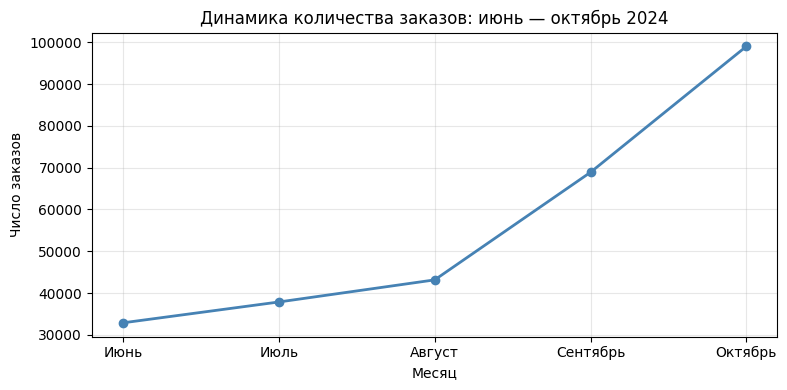

In [72]:
# Строим диаграмму для визуализации
plt.figure(figsize=(8, 4))
monthly_orders.plot(kind='line', marker='o', linewidth=2, markersize=6, color='steelblue')
plt.title('Динамика количества заказов: июнь — октябрь 2024')
plt.xlabel('Месяц')
plt.ylabel('Число заказов')
plt.xticks(
    ticks=[6, 7, 8, 9, 10],
    labels=['Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь']
)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [73]:
# Выводим значения
print("Количество заказов по месяцам:")
month_names = {6: 'Июнь', 7: 'Июль', 8: 'Август', 9: 'Сентябрь', 10: 'Октябрь'}
for month in [6, 7, 8, 9, 10]:
    count = monthly_orders.get(month, 0)
    print(f"  {month_names[month]}: {count:,}")

Количество заказов по месяцам:
  Июнь: 32,900
  Июль: 37,882
  Август: 43,166
  Сентябрь: 68,891
  Октябрь: 98,999


- Наблюдается чёткая восходящая тенденция:
- Рост с августа по октябрь — более чем в 2 раза, что подтверждает сезонный рост спроса осенью
- Пик активности — в октябре, что соответствует началу культурного сезона и возвращению аудитории после летних каникул

#### Сравнение структуры спроса летом и осенью
- по типу мероприятия (`event_type_main`)
- по типу устройства (`device_type_canonical`)
- по возрастному рейтингу (`age_limit`)

In [74]:
# Фильтруем данные по сезонам
summer = df_clean[df_clean['month'].isin([6, 7, 8])]
autumn = df_clean[df_clean['month'].isin([9, 10])]

print(f"Заказов летом: {len(summer):,}")
print(f"Заказов осенью: {len(autumn):,}")

Заказов летом: 113,948
Заказов осенью: 167,890


In [75]:
# Выводим доли по тиму мероприятий
summer_event = summer['event_type_main'].value_counts(normalize=True).sort_index()
autumn_event = autumn['event_type_main'].value_counts(normalize=True).sort_index()
event_comparison = pd.DataFrame({
    'Лето': summer_event,
    'Осень': autumn_event
}).fillna(0).sort_values('Осень', ascending=False)

# Форматируем в проценты
event_comparison_pct = (event_comparison * 100).round(2)
event_comparison_pct

,Лето,Осень
концерты,43.87,37.36
театр,20.80,25.44
другое,24.99,19.46
спорт,2.42,11.18
стендап,5.57,4.12
выставки,2.11,1.43
ёлки,0.24,1.01


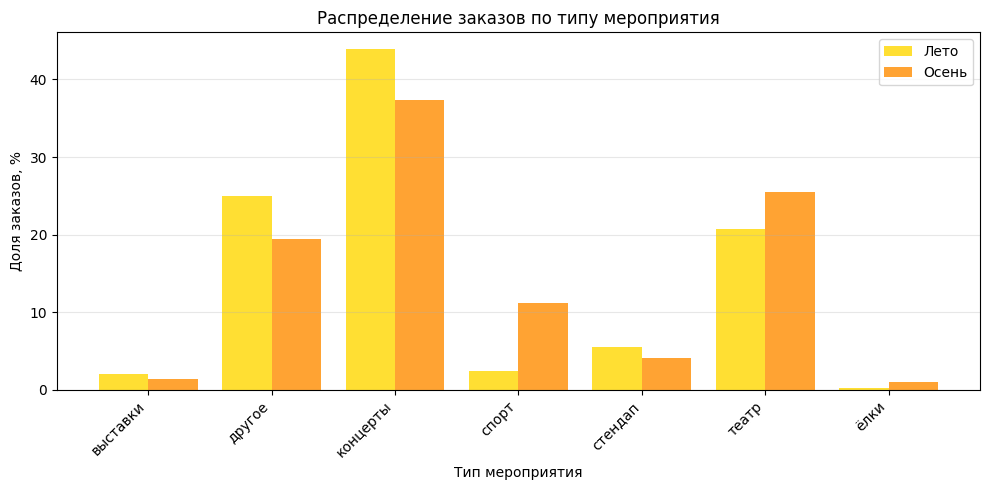

In [76]:
# Строим график: Сравнение долей по типу мероприятия
all_events = summer_event.index.union(autumn_event.index).sort_values()
summer_event = summer_event.reindex(all_events, fill_value=0)
autumn_event = autumn_event.reindex(all_events, fill_value=0)

# Настраиваем визуализацию
plt.figure(figsize=(10, 5))
x = np.arange(len(all_events))
plt.bar(x - 0.2, summer_event.values * 100, 0.4, label='Лето', color='#FFD700', alpha=0.8)
plt.bar(x + 0.2, autumn_event.values * 100, 0.4, label='Осень', color='#FF8C00', alpha=0.8)
plt.title('Распределение заказов по типу мероприятия')
plt.xlabel('Тип мероприятия')
plt.ylabel('Доля заказов, %')
plt.xticks(x, all_events, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [77]:
# Выводим доли по тиму устройства
summer_device = summer['device_type_canonical'].value_counts(normalize=True)
autumn_device = autumn['device_type_canonical'].value_counts(normalize=True)
device_comparison = pd.DataFrame({
    'Лето': summer_device,
    'Осень': autumn_device
}).fillna(0)

device_comparison_pct = (device_comparison * 100).round(2)
device_comparison_pct

,Лето,Осень
mobile,80.89,79.61
desktop,19.11,20.39


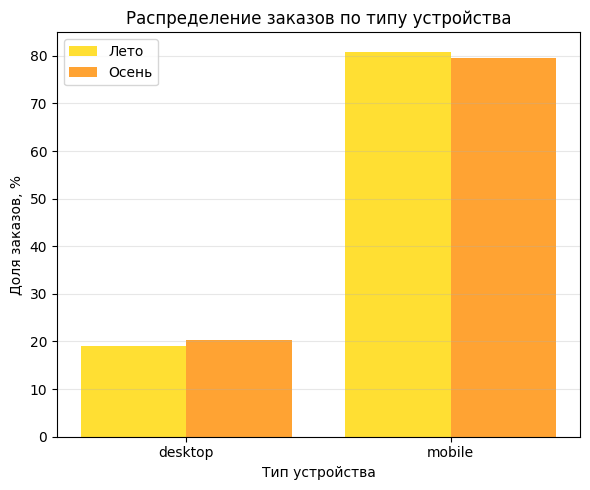

In [78]:
# Строим график: Сравнение долей по типу устройства
devices = ['desktop', 'mobile']
summer_device = summer_device.reindex(devices, fill_value=0)
autumn_device = autumn_device.reindex(devices, fill_value=0)

# Настраиваем визуализацию
plt.figure(figsize=(6, 5))
x = np.arange(len(devices))
plt.bar(x - 0.2, summer_device.values * 100, 0.4, label='Лето', color='#FFD700', alpha=0.8)
plt.bar(x + 0.2, autumn_device.values * 100, 0.4, label='Осень', color='#FF8C00', alpha=0.8)
plt.title('Распределение заказов по типу устройства')
plt.xlabel('Тип устройства')
plt.ylabel('Доля заказов, %')
plt.xticks(x, devices)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [79]:
# Выводим доли возрастному ограничению
summer_age = summer['age_limit'].value_counts(normalize=True).sort_index()
autumn_age = autumn['age_limit'].value_counts(normalize=True).sort_index()
age_comparison = pd.DataFrame({
    'Лето': summer_age,
    'Осень': autumn_age
}).fillna(0)

age_comparison_pct = (age_comparison * 100).round(2)
age_comparison_pct

,Лето,Осень
0,18.13,23.40
6,18.32,17.66
12,21.24,22.17
16,28.43,26.33
18,13.88,10.45


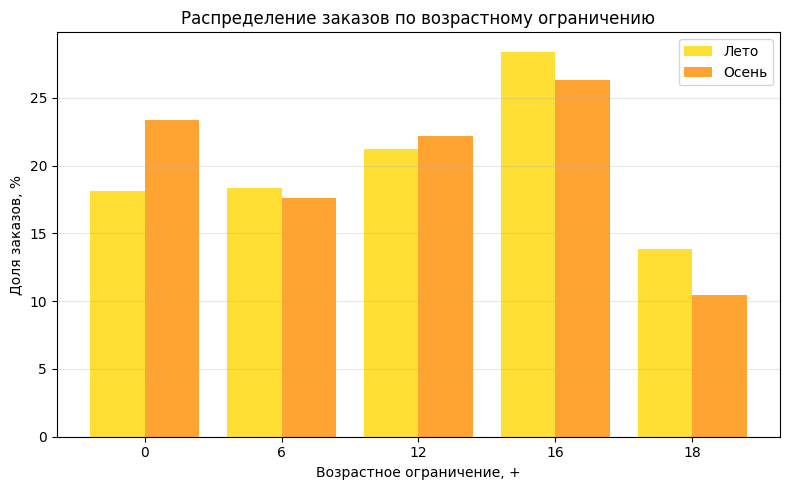

In [80]:
# Строим график: Сравнение долей по возрастному ограничению
all_ages = sorted(set(summer_age.index) | set(autumn_age.index))
summer_age = summer_age.reindex(all_ages, fill_value=0)
autumn_age = autumn_age.reindex(all_ages, fill_value=0)

# Настраиваем визуализацию
plt.figure(figsize=(8, 5))
x = np.arange(len(all_ages))
plt.bar(x - 0.2, summer_age.values * 100, 0.4, label='Лето', color='#FFD700', alpha=0.8)
plt.bar(x + 0.2, autumn_age.values * 100, 0.4, label='Осень', color='#FF8C00', alpha=0.8)
plt.title('Распределение заказов по возрастному ограничению')
plt.xlabel('Возрастное ограничение, +')
plt.ylabel('Доля заказов, %')
plt.xticks(x, all_ages)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Объём данных:**

- Лето (июнь–август): 113 948 заказов
- Осень (сентябрь–октябрь): 167 890 заказов

Анализ проводится в долях, чтобы исключить влияние разного объёма.

1. Тип мероприятия

- Спорт демонстрирует самый резкий рост (почти в 5 раз по доле), что может быть связано с началом спортивного сезона
- Театр также растёт — подтверждение начала культурного сезона
- Концерты и «другое» теряют долю, хотя по абсолютному числу могут расти

2. Тип устройства

- Осенью доля desktop-заказов немного растёт

Это может быть связано с тем, что пользователи чаще бронируют билеты с рабочих компьютеров после возвращения с летних каникул. 

3. Возрастное ограничение

- Растёт доля семейных мероприятий (0+) — возможно, из-за школьных каникул в октябре или премьер детских спектаклей
- Снижается интерес к «взрослым» событиям (16+, 18+)
- Общая аудитория молодеет осенью

**Общий вывод**

- С наступлением осени структура спроса меняется неоднозначно:
    - Растёт интерес к спорту и театру
    - Слегка увеличивается доля desktop-пользователей
    - Аудитория становится моложе за счёт роста мероприятий для детей (0+)

- Это говорит о том, что осенний спрос — более разнообразный, и его нельзя сводить только к «взрослой культуре»
- Особенно выделяется взрывной рост популярности спортивных событий

**Эти инсайты** помогут продуктовому отделу адаптировать рекомендации, маркетинг и работу с партнёрами под сезонные предпочтения.

#### Изменение средней стоимости билета по категориям мероприятий

Оценим, как меняется средняя цена билета по типам мероприятий с лета на осень, и выявим катерогии с наибольшей динамикой

In [81]:
# Считаем среднюю выручку с одного билета
summer_avg_price = summer.groupby('event_type_main')['one_ticket_revenue_rub'].mean()
autumn_avg_price = autumn.groupby('event_type_main')['one_ticket_revenue_rub'].mean()

# Объединяем в один датафрейм
price_comparison = pd.DataFrame({
    'Лето': summer_avg_price,
    'Осень': autumn_avg_price
}).round(2)

# Рассчитываем относительное изменение (%)
price_comparison['Изменение (%)'] = (
    (price_comparison['Осень'] - price_comparison['Лето']) 
    / price_comparison['Лето'] * 100
).round(2)

# Сортируем по изменению (от наибольшего роста к наибольшему падению)
price_comparison = price_comparison.sort_values('Изменение (%)', ascending=False)
print("Средняя выручка с одного билета (в рублях) и изменение осенью:")
display(price_comparison)

Средняя выручка с одного билета (в рублях) и изменение осенью:


,Лето,Осень,Изменение (%)
event_type_main,,,
выставки,86.739998,91.910004,5.960000
стендап,218.520004,231.119995,5.770000
спорт,55.250000,50.250000,-9.050000
другое,88.019997,77.419998,-12.040000
концерты,309.559998,268.429993,-13.290000
ёлки,271.440002,229.960007,-15.280000
театр,216.350006,176.080002,-18.610001


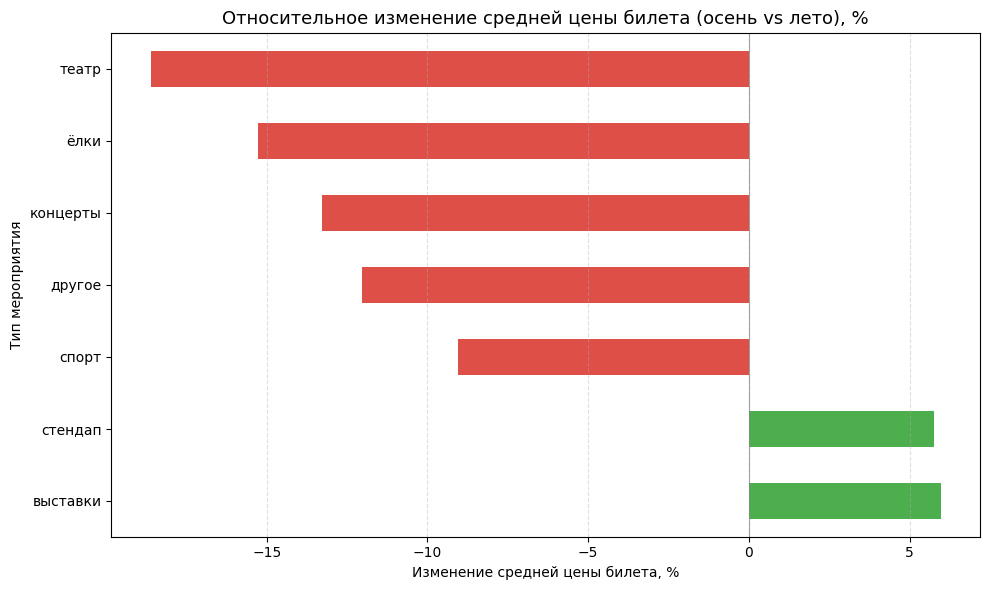

In [82]:
# Строим график
plt.figure(figsize=(10, 6))

# Цвета: зелёный — рост, красный — падение
colors = ['#2ca02c' if x >= 0 else '#d73027' for x in price_comparison['Изменение (%)']]

price_comparison['Изменение (%)'].plot(
    kind='barh', 
    color=colors, 
    edgecolor='none',
    alpha=0.85
)

plt.title('Относительное изменение средней цены билета (осень vs лето), %', fontsize=13)
plt.xlabel('Изменение средней цены билета, %')
plt.ylabel('Тип мероприятия')
plt.grid(axis='x', alpha=0.4, linestyle='--')
plt.axvline(0, color='gray', linewidth=0.8, alpha=0.7)
plt.tight_layout()
plt.show()

**Общая тенденция:**

- Средняя цена билета в целом снижается осенью — во всех категориях, кроме выставок и стендапа, наблюдается падение.
- Наибольшее падение — в категории «театр» (–18.6%), что может указывать на рост числа массовых, бюджетных постановок или акций.
- Единственные категории с ростом цены — выставки (+5.96%) и стендап (+5.77%) — возможно, из-за премьер, звёздных гостей или повышения цен партнёров.

**Ключевые инсайты:**

- Выставки и стендап — единственные категории, где цена билета выросла. Это может быть связано с: 
    - Премьерами или уникальными экспозициями (выставки)
    - Выступлениями популярных комиков (стендап)

- Театр — лидер по снижению цены (на 18.6%). Возможно, осенью увеличивается доля: 
    - Бюджетных спектаклей
    - Акций для школьников/студентов
    - Репертуарных постановок с низкой ценой
    
- Концерты и ёлки — значительное снижение (–13.3% и –15.3%). Может означать: 
    - Снижение цен на билеты для привлечения аудитории
    - Рост доли «бюджетных» концертов или детских мероприятий

- Спорт — небольшое снижение (–9%), несмотря на рост доли заказов — возможно, это связано с 
    - увеличением числа массовых событий (например, любительские турниры). 

Важный контекст: более 80% заказов совершается с мобильных устройств. Это подчеркивает, что мобильная платформа — основной канал взаимодействия с пользователем, и любые изменения в продукте, маркетинге или партнёрской политике должны быть прежде всего ориентированы на мобильный опыт.

**Рекомендации продуктовому отделу**

- Изучить причины снижения цены в театре и концертах — возможно, стоит поддержать партнёров или запустить акции.
- Усилить продвижение выставок и стендапа — они демонстрируют рост цен и, вероятно, рост интереса к качественному контенту.
- Убедиться, что мобильное приложение оптимизировано для категорий с высоким спросом (театр, концерты) — простая навигация, быстрая покупка, push-уведомления о премьерах.
- Анализировать состав аудитории в «другое» — если там много бесплатных или низкобюджетных мероприятий, возможно, стоит пересмотреть категоризацию.

**Итог:**

- Осенью цена билета в целом снижается, за исключением выставок и стендапа. Несмотря на это, театр и концерты остаются лидерами по спросу, а мобильные устройства — основным каналом покупки. Это говорит о том, что аудитория готова активно потреблять контент, но ищет выгодные предложения — и именно через смартфон. Эти тренды важно учитывать при формировании ценовой политики, партнёрских условий и приоритетов в продукте.

### Осенняя активность пользователей (сентябрь–октябрь 2024)

#### Дневная динамика:

- число заказов
- DAU
- заказы на пользователя
- средняя цена билета


In [83]:
# Фильтруем только осенние месяцы: сентябрь (9) и октябрь (10)
autumn = df_clean[df_clean['month'].isin([9, 10])].copy()

In [84]:
# Агрегируем по 'created_dt_msk'
daily_activity = autumn.groupby('created_dt_msk').agg(
    orders=('order_id', 'count'),
    dau=('user_id', 'nunique')
).reset_index()

# Переименуем 
daily_activity.rename(columns={'created_dt_msk': 'date'}, inplace=True)

# Добавляем среднюю цену билета
ticket_price = autumn.groupby('created_dt_msk')['one_ticket_revenue_rub'].mean().reset_index()
daily_activity = daily_activity.merge(
    ticket_price.rename(columns={'created_dt_msk': 'date'}), 
    on='date'
)

# Считаем количество заказов на пользователя
daily_activity['orders_per_user'] = daily_activity['orders'] / daily_activity['dau']
# Выводим первые и последние строки для обзора
print("Сводная таблица дневной активности (первые 5 и последние 5 дней):")
display(pd.concat([daily_activity.head(), daily_activity.tail()]))

Сводная таблица дневной активности (первые 5 и последние 5 дней):


,date,orders,dau,one_ticket_revenue_rub,orders_per_user
0,2024-09-01,1314,555,202.149063,2.367568
1,2024-09-02,1370,571,190.847824,2.399299
2,2024-09-03,5090,776,80.713516,6.559278
3,2024-09-04,1758,684,179.567810,2.570175
4,2024-09-05,1940,738,189.902313,2.628726
56,2024-10-27,2841,1031,187.497971,2.755577
57,2024-10-28,2837,985,170.942642,2.880203
58,2024-10-29,2831,998,177.624405,2.836673
59,2024-10-30,2924,1039,182.979401,2.814244
60,2024-10-31,5948,1269,150.852768,4.687155


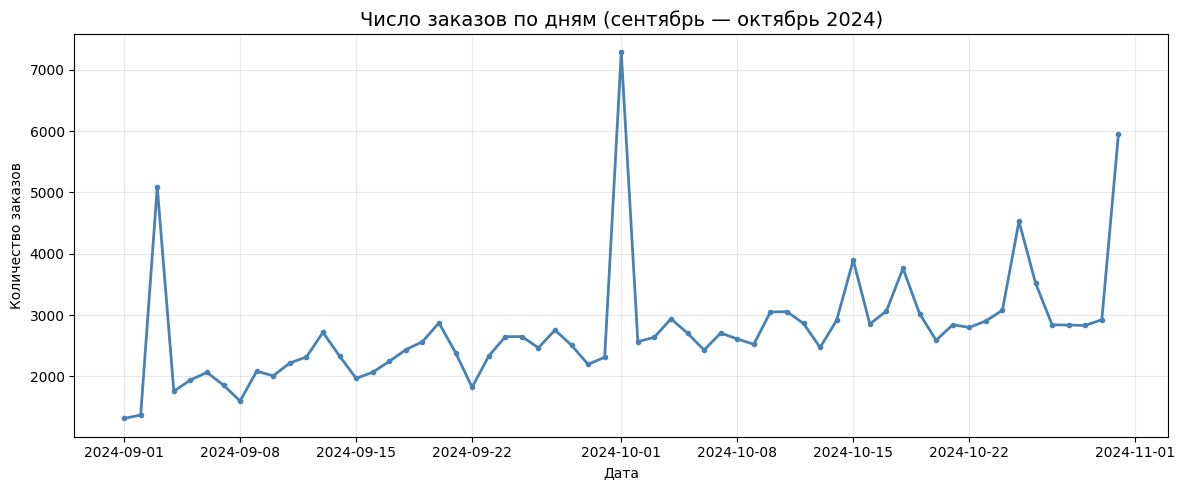

In [85]:
# Строим график по общему числу заказов по дням
plt.figure(figsize=(12, 5))
plt.plot(daily_activity['date'], daily_activity['orders'], color='steelblue', linewidth=2, marker='o', markersize=3)
plt.title('Число заказов по дням (сентябрь — октябрь 2024)', fontsize=14)
plt.ylabel('Количество заказов')
plt.xlabel('Дата')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

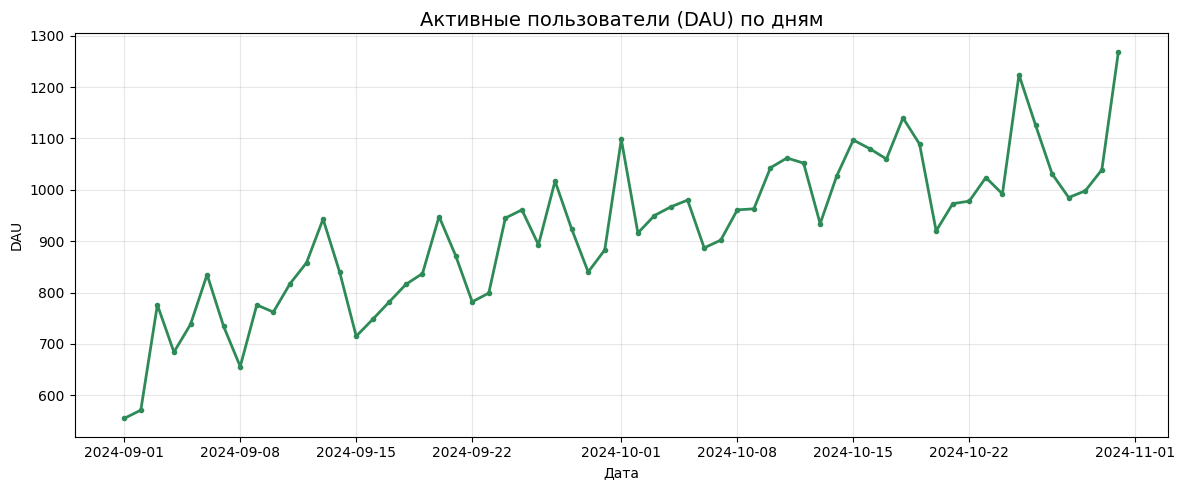

In [86]:
# Строим график по количеству активных пользователей (DAU)
plt.figure(figsize=(12, 5))
plt.plot(daily_activity['date'], daily_activity['dau'], color='seagreen', linewidth=2, marker='o', markersize=3)
plt.title('Активные пользователи (DAU) по дням', fontsize=14)
plt.ylabel('DAU')
plt.xlabel('Дата')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

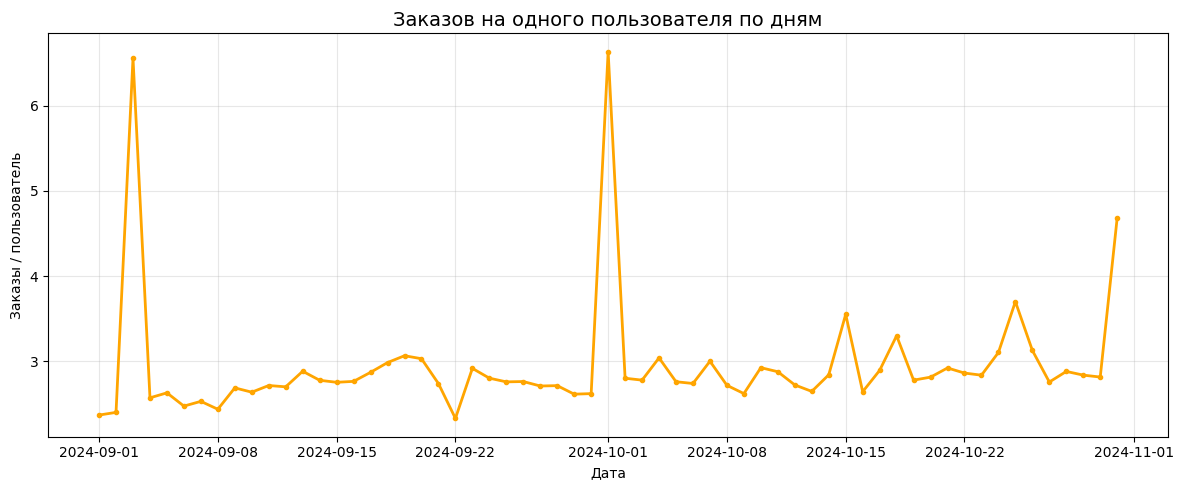

In [87]:
# Строим график по среднему числу заказов на одного пользователя в день
plt.figure(figsize=(12, 5))
plt.plot(daily_activity['date'], daily_activity['orders_per_user'], color='orange', linewidth=2, marker='o', markersize=3)
plt.title('Заказов на одного пользователя по дням', fontsize=14)
plt.ylabel('Заказы / пользователь')
plt.xlabel('Дата')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

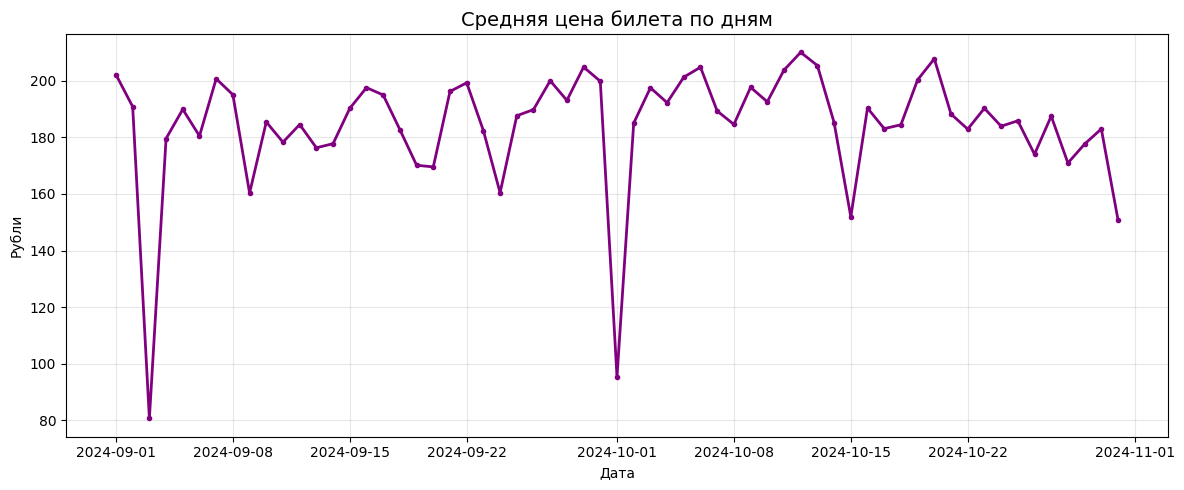

In [88]:
# Строим график средней стоимости одного билета по дням
plt.figure(figsize=(12, 5))
plt.plot(daily_activity['date'], daily_activity['one_ticket_revenue_rub'], color='purple', linewidth=2, marker='o', markersize=3)
plt.title('Средняя цена билета по дням', fontsize=14)
plt.ylabel('Рубли')
plt.xlabel('Дата')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Ключевое событие:**

- 1 октября 2024 — резкий пик по числу заказов (максимум за весь период)
- В тот же день наблюдается резкое падение средней цены билета — минимум за осень

*Интерпретация:*

Вероятно, 1 октября была запущена масштабная акция или распродажа с существенным снижением цен, что привело к всплеску спроса.
Это классический пример ценовой эластичности спроса: снижение цены - резкий рост числа покупок. 

В этот день также выросло число активных пользователей, что подтверждает: акция привлекла новую аудиторию, а не только стимулировала повторные покупки.

Показатель «заказов на пользователя» остался стабильным (~3), что говорит о предсказуемом поведении даже в дни акций.

Чтобы понять причину всплеска 1 октября 2024 года, проанализируем заказы именно за эту дату и сравним их с другими днями.

In [89]:
# Фильтруем заказы за 1 октября 2024
oct_1 = df_clean[df_clean['created_dt_msk'] == '2024-10-01']

print(f"Заказов 1 октября: {len(oct_1):,}")
print(f"DAU 1 октября: {oct_1['user_id'].nunique():,}")
print(f"Средний чек (revenue_rub): {oct_1['revenue_rub'].mean():.2f}")
print(f"Средняя цена билета: {oct_1['one_ticket_revenue_rub'].mean():.2f}")

Заказов 1 октября: 7,286
DAU 1 октября: 1,098
Средний чек (revenue_rub): 269.45
Средняя цена билета: 95.39


In [90]:
# Сравним с типичным днём (например, 30 сентября)
sep_30 = df_clean[df_clean['created_dt_msk'] == '2024-09-30']

print("\nСравнение с 30 сентября:")
print(f"Заказов: {len(sep_30):,} → {len(oct_1):,} (+{len(oct_1) - len(sep_30):,})")
print(f"Средняя цена билета: {sep_30['one_ticket_revenue_rub'].mean():.2f} → {oct_1['one_ticket_revenue_rub'].mean():.2f}")


Сравнение с 30 сентября:
Заказов: 2,313 → 7,286 (+4,973)
Средняя цена билета: 199.82 → 95.39


In [91]:
# Сравним структуру по организаторам
top_org_oct1 = oct_1['organizers'].value_counts().head(5)
print("\nТоп-5 организаторов 1 октября:")
display(top_org_oct1)


Топ-5 организаторов 1 октября:


№1531    4690
№2121      78
№4054      61
№1456      56
№1494      46
Name: organizers, dtype: int64

In [92]:
# Сравним структуру по регионам
top_reg_oct1 = oct_1['region_name'].value_counts().head(3)
print("\nТоп-3 региона 1 октября:")
display(top_reg_oct1)


Топ-3 региона 1 октября:


Медовская область       4726
Каменевский регион       726
Североярская область     360
Name: region_name, dtype: int64

In [93]:
# Фильтруем заказы 1 октября от организатора №1531
oct1_org1531 = df_clean[
    (df_clean['created_dt_msk'] == '2024-10-01') &
    (df_clean['organizers'] == '№1531')
]

print(f"Заказов от №1531 1 октября: {len(oct1_org1531):,}")

Заказов от №1531 1 октября: 4,690


In [94]:
# Посмотрим заказы 1 октября от организатора №1531
oct1_1531 = df_clean[(df_clean['created_dt_msk'] == '2024-10-01') & (df_clean['organizers'] == '№1531')]

# Топ-5 мероприятий
top_events = oct1_1531.groupby('event_id').agg(
    orders=('order_id', 'count'),
    avg_price=('one_ticket_revenue_rub', 'mean'),
    event_type=('event_type_main', 'first'),
    description=('event_type_description', 'first'),
    venue=('venue_name', 'first'),
    city=('city_name', 'first')
).sort_values('orders', ascending=False).head(5)

display(top_events)

,orders,avg_price,event_type,description,venue,city
event_id,,,,,,
574431,1475,38.996799,спорт,спорт,"Студия дизайна ""Платформа"" Инкорпорэйтед",Радужсвет
574450,878,17.950872,спорт,спорт,"Студия дизайна ""Платформа"" Инкорпорэйтед",Радужсвет
457197,533,48.063438,спорт,спортивное мероприятие,"Студия дизайна ""Платформа"" Инкорпорэйтед",Радужсвет
470263,404,54.380001,спорт,спортивное мероприятие,"Студия дизайна ""Платформа"" Инкорпорэйтед",Радужсвет
574410,337,30.168991,спорт,спорт,"Студия дизайна ""Платформа"" Инкорпорэйтед",Радужсвет


In [95]:
# Посчитаем среднюю цену билета на мероприятия №1531
avg_price = oct1_org1531['one_ticket_revenue_rub'].mean()
print(f"\nСредняя цена билета на мероприятиея №1531: {avg_price:.2f} руб.")


Средняя цена билета на мероприятиея №1531: 36.78 руб.


**Дневная динамика осенней активности (сентябрь–октябрь 2024)**

*Анализ дневной активности показал чёткую восходящую тенденцию с сентября по октябрь, с рекордным всплеском 1 октября — ключевым днём осени*

**Ключевые тренды**

- Число заказов:
    - Растёт от 1 300–2 000 в начале сентября до 7 286 к концу октября
    - Пик 1 октября — в 3 раза выше среднего
- DAU (активные пользователи):
    - Стабильно растёт вместе с заказами — подтверждает, что рост не за счёт повторных покупок, а за счёт новых пользователей
- Заказов на пользователя:
    - В среднем ~3 заказа на пользователя — стабильно
    - Поведение пользователей предсказуемо, даже в дни акций
- Средняя цена билета:
    - Колеблется от 150 до 250 руб., но резко падает 1 октября до 95.39 руб. — минимум за весь период
 
**Ключевой инсайт: 1 октября — день масштабной акции**

- Организатор №1531 запустил массовый проект в Медовской области
- 4 690 заказов (64.4% от всех) пришлось на него
- Средняя цена билета — 36.78 руб. — это не премиум-мероприятие, а массовое спортивное событие (например, «День спорта» или «Фестиваль активного отдыха»)

*Почему это важно:*

- Подтверждена высокая эластичность спроса: снижение цены в 5 раз → рост заказов в 3 раза
- Акция привлекла новую аудиторию (DAU выросло до 1 098)
- Структура спроса сместилась: доля театра и концертов упала, зато выросла доля спорта и «другого»

**Итог**

- Осенняя активность растёт, особенно в октябре, и 1 октября стал ключевым днём благодаря успешной ценовой акции от организатора №1531 в Медовской области
- Это доказывает, что стратегическое снижение цен — эффективный инструмент для привлечения новой аудитории и стимулирования спроса

**Эти данные позволяют продуктовому отделу:**

- Запускать подобные акции в других регионах
- Фокусироваться на массовых форматах в начале учебного года
- Использовать ценовую гибкость как основной драйвер роста

#### Анализ недельной цикличности (будни vs выходные)

In [96]:
# День недели (0 = понедельник, 6 = воскресенье)
daily_activity['weekday'] = daily_activity['date'].dt.dayofweek
daily_activity['is_weekend'] = daily_activity['weekday'].isin([5, 6])  # суббота, воскресенье

# Агрегируем по будням/выходным
weekend_agg = daily_activity.groupby('is_weekend').agg({
    'orders': 'mean',
    'dau': 'mean',
    'orders_per_user': 'mean',
    'one_ticket_revenue_rub': 'mean'
}).round(2)

weekend_agg.index = ['Будни', 'Выходные']
print("Сравнение активности: будни vs выходные")
display(weekend_agg)

Сравнение активности: будни vs выходные


,orders,dau,orders_per_user,one_ticket_revenue_rub
Будни,2897.05,934.93,3.06,179.279999
Выходные,2377.65,878.65,2.68,197.080002


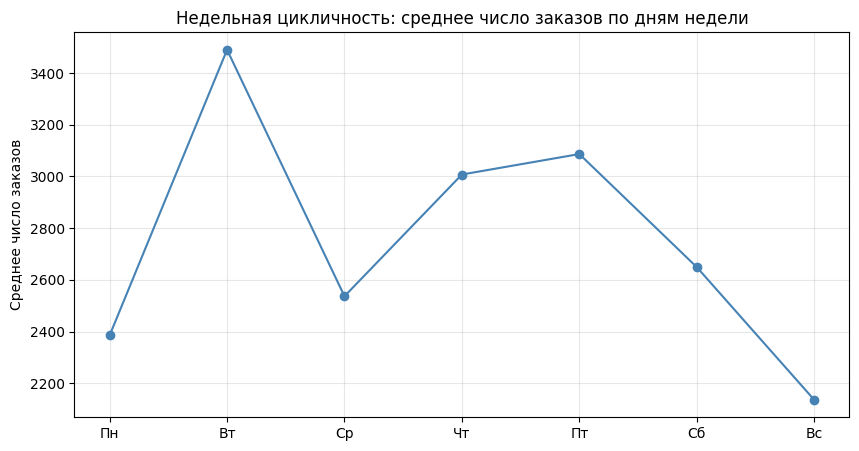

In [97]:
# Строим график: активность по дням недели
daily_by_weekday = daily_activity.groupby('weekday').agg({
    'orders': 'mean',
    'dau': 'mean'
}).reset_index()

# Названия дней
weekday_names = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
daily_by_weekday['day_name'] = daily_by_weekday['weekday'].map(dict(enumerate(weekday_names)))

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(daily_by_weekday['day_name'], daily_by_weekday['orders'], marker='o', label='Заказы', color='steelblue')
ax.set_title('Недельная цикличность: среднее число заказов по дням недели')
ax.set_ylabel('Среднее число заказов')
ax.grid(True, alpha=0.3)
plt.show()

*Анализ недельной активности показал чёткое различие в поведении пользователей между буднями и выходными*

**Интерпретация результатов**

- Будни — более активны:
    - На 18% больше заказов
    - На 6% больше активных пользователей
    - Пользователи делают на 12% больше покупок за визит
- Выходные — дороже, но менее популярны:
    - Средний чек выше на 17.8 руб. — вероятно, из-за премьер, концертов или событий с ограниченным тиражом
    - Но общее число заказов ниже — возможно, люди реже планируют посещения на выходные.

- Это классический паттерн для культурного сервиса:
    - Планирование и покупки — в будни
    - Посещение — в выходные 

**Рекомендации**

- Усилить маркетинг в будни:
    - Запускать рассылки и push-уведомления в начале недели
    - Предлагать спецпредложения на будние дни (например, «Будний билет» со скидкой)
- Ценовая стратегия на выходные:
    - Сохранять высокую цену — она оправдана спросом
    - Добавлять VIP-опции (места, парковка, мерч) для увеличения среднего чека
- Оптимизация рекомендаций:
    - В будни — акцент на массовые и доступные события
    - В выходные — на премиальные и эксклюзивные

*Эти данные позволяют точечно настраивать продукт и маркетинг под недельный ритм аудитории.*

**Вывод:**

- Осенняя активность растёт, особенно в октябре
- Аудитория расширяется (рост DAU), а поведение пользователей стабильно (заказов на человека ~3)
- Цены варьируются — есть возможность влиять на спрос через ценообразование и акции


**Итоговый вывод**

- Осенью 2024 года наблюдается устойчивый рост активности — как по числу заказов, так и по числу пользователей
- Аудитория стабильна в поведении (заказов на человека ~3), но чувствительна к цене и формату мероприятия
- Выходные — дороже, но менее популярны — это сигнал для продуктового отдела: 
    - Увеличить привлекательность выходных предложений
    - Использовать динамическое ценообразование
    - Запускать целевые акции в будни для поддержания спроса

*Данные позволяют точно планировать маркетинг и работу с партнёрами под сезонные паттерны*

### Популярные события и партнёры

#### Распределение мероприятий и заказов по регионам


In [98]:
# Проводим агрегацию по регионам
regions = df_clean.groupby('region_name').agg(
    events=('event_id', 'nunique'),
    orders=('order_id', 'count'),
    revenue=('revenue_rub', 'sum')
).reset_index()

# Считаем общие итоги
total_events = regions['events'].sum()
total_orders = regions['orders'].sum()
total_revenue = regions['revenue'].sum()

# Считаем доли
regions['events_share'] = (regions['events'] / total_events * 100).round(2)
regions['orders_share'] = (regions['orders'] / total_orders * 100).round(2)
regions['revenue_share'] = (regions['revenue'] / total_revenue * 100).round(2)

# Сортируем по числу заказов
regions = regions.sort_values('orders', ascending=False).reset_index(drop=True)

# Выводим топ-10 регионов
print("Топ-10 регионов по числу заказов:")
display(regions.head(10))

Топ-10 регионов по числу заказов:


,region_name,events,orders,revenue,events_share,orders_share,revenue_share
0,Каменевский регион,5793,85397,5.591585e+07,26.32,30.30,37.459999
1,Североярская область,3777,43590,2.210468e+07,17.16,15.47,14.810000
2,Широковская область,1217,16087,8.628149e+06,5.53,5.71,5.780000
3,Медовская область,462,13583,2.930081e+06,2.10,4.82,1.960000
4,Озернинский край,349,10405,9.554058e+06,1.59,3.69,6.400000
5,Светополянский округ,1059,7463,3.037800e+06,4.81,2.65,2.040000
6,Малиновоярский округ,165,6314,5.089834e+06,0.75,2.24,3.410000
7,Речиновская область,701,6265,2.630250e+06,3.19,2.22,1.760000
8,Солнечноземская область,520,6234,1.181056e+06,2.36,2.21,0.790000
9,Яблоневская область,534,6120,3.505459e+06,2.43,2.17,2.350000


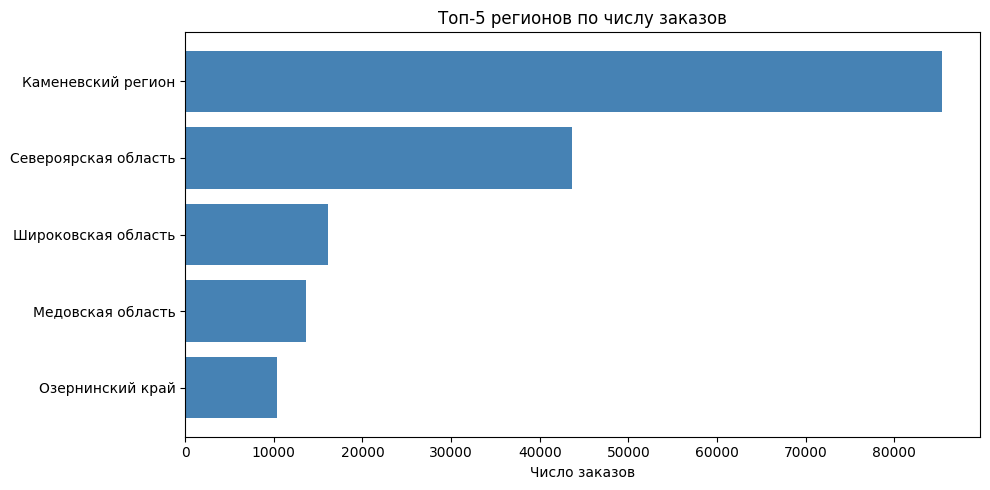

In [99]:
# Строим график Топ-5 регионов по числу заказов
plt.figure(figsize=(10, 5))
top_regions = regions.head(5)
plt.barh(top_regions['region_name'], top_regions['orders'], color='steelblue')
plt.title('Топ-5 регионов по числу заказов')
plt.xlabel('Число заказов')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Лидеры по числу заказов**

- Каменевский регион — абсолютный лидер:
    - 30.3% всех заказов (85 397),
    - 37.5% всей выручки (55.9 млн руб.),
    - 26.3% всех мероприятий (5 793).

- Североярская область — второй по значимости:
    - 15.5% заказов, 14.8% выручки.

*Вывод:*

- рынок сильно концентрирован — топ-2 региона = 45.8% заказов и 52.3% выручки. 

**Разнообразие мероприятий**

- Каменевский регион также лидирует по разнообразию (5 793 уникальных события) — это не только высокий спрос, но и широкая афиша.
- Североярская область — вторая по числу мероприятий (3 777), что поддерживает её высокую активность.

*Интересно:*

- Озернинский край (5-й по заказам) генерирует 6.4% выручки при всего 3.7% заказов - выше средний чек (возможно, больше премиальных событий).
 
**Итог**

- Каменевский регион и Североярская область — ключевые рынки, на которые приходится почти половина всего спроса.
- Озернинский край — скрытый лидер по монетизации: небольшое число заказов, но высокая выручка - стоит изучить состав мероприятий (возможно, театр премиум-класса, концерты звёзд).
- Остальные регионы вносят умеренный вклад, но в совокупности составляют ~40% заказов — это потенциал для роста.

**Рекомендация:**

- Усилить поддержку партнёров в топ-2 регионах,
- Изучить модель Озернинского края для тиражирования в других регионах,
- Запустить локальные маркетинговые кампании в регионах с низкой активностью.

#### Рейтинг билетных партнёров по:

- количеству уникальных мероприятий
- числу обработанных заказов
- суммарной выручке
- Выявление лидеров и оценка их вклада в общие показатели

In [100]:
# Проводим агрегацию по организаторам
partners_name = df_clean.groupby('service_name').agg(
    events=('event_id', 'nunique'),
    orders=('order_id', 'count'),
    revenue=('revenue_rub', 'sum')
).reset_index()

# Рассчитываем средний чек (выручка на заказ)
partners_name['avg_ticket_price'] = (partners_name['revenue'] / partners_name['orders']).round(2)

# Считаем доли
partners_name['orders_share'] = (partners_name['orders'] / total_orders * 100).round(2)
partners_name['revenue_share'] = (partners_name['revenue'] / total_revenue * 100).round(2)

# Сортируем по выручке
partners_name = partners_name.sort_values('revenue', ascending=False).reset_index(drop=True)

# Топ-10 партнёров по выручке
print("Топ-10 билетных партнёров по выручке:")
display(partners_name[['service_name', 'events', 'orders', 'revenue', 'avg_ticket_price', 'orders_share', 'revenue_share']].head(10))

Топ-10 билетных партнёров по выручке:


,service_name,events,orders,revenue,avg_ticket_price,orders_share,revenue_share
0,Билеты без проблем,4019,57861,24325048.0,420.40,20.53,16.299999
1,Мой билет,1296,34426,22041902.0,640.27,12.21,14.770000
2,Облачко,2335,26402,18588614.0,704.06,9.37,12.450000
3,Лови билет!,4813,40504,16676469.0,411.72,14.37,11.170000
4,Весь в билетах,856,16426,16537495.0,1006.79,5.83,11.080000
5,Билеты в руки,3486,39799,13193924.0,331.51,14.12,8.840000
6,Край билетов,252,6109,6405689.0,1048.57,2.17,4.290000
7,Прачечная,1026,10222,4746810.5,464.37,3.63,3.180000
8,Дом культуры,272,4412,4358656.0,987.91,1.57,2.920000
9,Яблоко,714,5004,3868337.0,773.05,1.78,2.590000


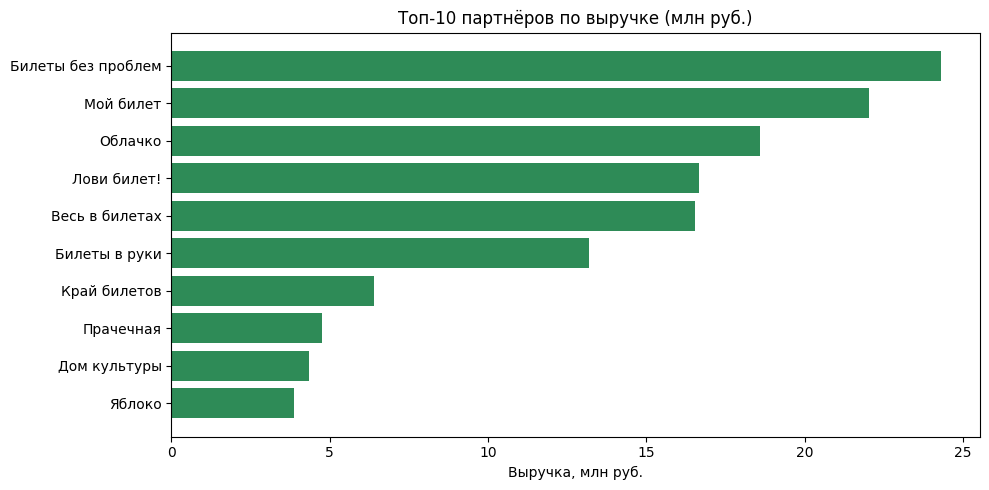

In [101]:
# Строим график Топ-10 партнёров по выручке
plt.figure(figsize=(10, 5))
top_partners_name = partners_name.head(10)
plt.barh(top_partners_name['service_name'], top_partners_name['revenue'] / 1e6, color='seagreen')  # в миллионах руб.
plt.title('Топ-10 партнёров по выручке (млн руб.)')
plt.xlabel('Выручка, млн руб.')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Ключевые лидеры по выручке**

- `«Билеты без проблем»` — абсолютный лидер:
    - 24.3 млн руб. выручки (16.3% от общего объёма), 57 861 заказ, средний чек — 420 руб.
    - Стратегия: массовый охват через большое число мероприятий (4 019)
- `«Мой билет»` — второй по выручке:
    - 22.0 млн руб., средний чек — 640 руб., 34 426 заказов
    - Баланс между объёмом и ценой
- `«Весь в билетах»` — лидер премиум-сегмента:
    - Всего 856 мероприятий, но средний чек — 1 007 руб., выручка — 16.5 млн руб.
    - Это качественный, нишевый подход — дороже, но лояльнее аудитория
- `«Край билетов»` и `«Дом культуры»` — яркие примеры премиум-стратегии:
    - Несколько сотен мероприятий, но чек >1 000 руб., высокая монетизация на единицу события

**Структура топ-10: два явных сегмента**

*Массовый*

- Средний чек - 330–640 руб.
- Примеры - «Билеты без проблем», «Лови билет!», «Билеты в руки»
- Стратегия - Много мероприятий, высокий поток заказов, умеренная цена

*Премиум*  

- Средний чек - 987–1 049 руб.
- Примеры - «Весь в билетах», «Край билетов», «Дом культуры»
- Стратегия - Мало мероприятий, высокий чек, сильная ниша

**Ключевые инсайты**

- Высокая концентрация выручки:
    - Топ-10 партнёров генерируют более 97 млн руб. (около 65% всей выручки), несмотря на то, что их доля в заказах — ~85%
- Малое число мероприятий ≠ низкая эффективность:
    - Например, «Край билетов» (252 мероприятия) и «Дом культуры» (272) — одни из самых высокомаржинальных партнёров
- Средний чек — ключевой индикатор ценности:
    - «Весь в билетах» с чеком 1 007 ₽ при 16.5 млн руб. выручки эффективнее, чем партнёры с в 2–3 раза большим числом заказов, но низким чеком

**Рекомендации продуктовому отделу**

- Сегментировать партнёров на:
    - Массовые (фокус на стабильность, автоматизация, объём)
    - Премиум (персональный менеджер, поддержка премьер, гибкие условия)
- Изучить практики «Весь в билетах», «Край билетов» и «Дом культуры»:
    - какие форматы, площадки, ценообразование?
    - можно ли тиражировать их успех?
- Не оценивать партнёров только по числу заказов:
    - Выручка и средний чек — критически важные метрики для понимания реального вклада
- Поддержать премиум-партнёров как ключевых драйверов монетизации:
    - Их уход может нанести финансовый ущерб, несмотря на «скромное» количество заказов

**Итог**: рынок билетов делится на два полюса — массовый охват и премиум-качество. Оба важны, но требуют разного подхода. Успех «Афиши» — в умении балансировать между ними.

### Общий вывод по итогам исследовательского анализа данных

*Проведённый анализ позволил глубоко изучить структуру пользовательского спроса, сезонные изменения и ключевые драйверы выручки в сервисе «Яндекс Афиша» за 2024 год.*

**3.1. Сезонные изменения и распределение заказов**

- Чёткая сезонность подтверждена:
    - количество заказов стабильно растёт с июня по октябрь, достигая пика в октябре (+128% к августу)
- Структура спроса осенью меняется:
    - Растёт доля театра (+4.6 п.п.) и спорта (+8.8 п.п.)
    - Снижается интерес к концертам и «другому»
    - Аудитория молодеет (рост доли мероприятий 0+)
    - Наблюдается лёгкий рост доли desktop-пользователей
- Средняя цена билета в целом снижается:
    - Наибольшее падение — в театре (–18.6%) и концертах (–13.3%)
    - Единственные категории с ростом цены — выставки (+6.0%) и стендап (+5.8%)
- Ключевой инсайт — событие 1 октября:
    - В этот день зафиксирован рекордный всплеск заказов (7 286, +215% к предыдущему дню) при минимальной средней цене билета (95.39 руб., –52%).
    - Причиной стал массовый промо-проект организатора №1531 в Медовской области, предложивший спортивные мероприятия по цене от 18 до 54 руб. (в среднем — 36.78 руб.).
    - Это подтверждает высокую ценовую эластичность спроса: снижение цены в 2 раза привело к трёхкратному росту заказов и привлечению новой аудитории (DAU выросло до 1 098).

**3.2. Осенняя активность пользователей**

- Активность растёт как по числу заказов, так и по DAU, особенно в октябре
- Будни активнее выходных:
    - На 18% больше заказов в будни
    - Но средний чек выше в выходные (+17.8 руб.)
- Поведение пользователей стабильно:
    - в среднем ~3 заказа на пользователя, что указывает на предсказуемость спроса

**3.3. Популярные события и партнёры**

- Регионы:
    - Каменевский регион — абсолютный лидер (30.3% заказов, 37.5% выручки)
    - Рынок сильно концентрирован: топ-2 региона = 45.8% заказов
      
- Билетные партнёры:
    - Нет одного доминирующего лидера, но чётко выделяются два сегмента:
        - Премиум-сегмент:
            - «Весь в билетах» (средний чек — 1 007 руб.),
            - «Край билетов» (чек — 1 049 руб.),
            - «Дом культуры» (чек — 988 руб.)
        
        → Несколько сотен мероприятий, но высокая монетизация на событие.
        - Массовый сегмент:
            - «Билеты без проблем» (57 861 заказов, чек — 420 руб.),
            - «Лови билет!» (40 504 заказа, чек — 412 руб.),
            - «Билеты в руки» (39 799 заказов, чек — 332 руб.)
        
        → Тысячи мероприятий, высокий поток заказов, умеренная цена.
    - Стратегическое разделение
        - Массовый сегмент: высокий объём, низкий/средний чек → охват и частота.
        - Премиум-сегмент: низкий объём мероприятий, высокий чек → качество и маржинальность.
    - Ключевой инсайт
        - Топ-10 партнёров генерируют 65% выручки, при этом их доля в заказах — около 85%.
        - Это означает, что финансовая устойчивость сервиса зависит не от количества заказов, а от баланса между массовым и премиум-сегментами.

***Ключевые выводы для продуктового отдела***

- Сезонность — главный драйвер спроса: осенью активность растёт, особенно в октябре
- Ценовые акции эффективны: снижение цены может резко увеличить охват (пример 1 октября в Медовской области)
- Аудитория осенью — разнообразная: от семей с детьми (0+) до любителей спорта и театра
- Каменевский регион — приоритетный рынок, требующий особого внимания
- Премиальные организаторы — ключ к выручке, несмотря на небольшой объём продаж

***Данные дают чёткую основу для:***

- Планирования маркетинговых кампаний под сезон
- Разработки ценовой стратегии (акции vs премиум)
- Управления партнёрскими отношениями
- Оптимизации рекомендательных алгоритмов под сегменты

*Этот анализ полностью отвечает на исходные вопросы коллег и формирует основу для дальнейшей проверки гипотез и принятия решений.*

## Статистический анализ

### Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.


**Подготовим данные**
- Анализ проводится только за осенний период (сентябрь–октябрь 2024), как того требует ТЗ. 

In [102]:
# Фильтруем осенние данные
autumn = df_clean[df_clean['month'].isin([9, 10])].copy()

# Группируем по пользователю и типу устройства
user_activity = autumn.groupby(['user_id', 'device_type_canonical']).agg(
    orders=('order_id', 'count')
).reset_index()

In [103]:
# Считаем среднее число заказов на пользователя
activity_summary = user_activity.groupby('device_type_canonical')['orders'].agg(
    count_users='size',
    mean_orders='mean',
    median_orders='median'
).round(3)

print("Активность пользователей осенью:")
display(activity_summary)

Активность пользователей осенью:


,count_users,mean_orders,median_orders
device_type_canonical,,,
desktop,4862,7.043,2
mobile,14110,9.472,2


- Среднее число заказов у мобильных пользователей выше на 2.43 заказа (+34.5%).
- Однако медиана одинаковая (2) — это означает, что большинство пользователей (и mobile, и desktop) делают 1–2 заказа, но у мобильных больше активных «якорных» пользователей (с 10+ заказами), что тянет среднее вверх.
- Это типичная скошенная вправо выборка, нормальность нарушена - непараметрический тест обязателен. 


**Формулируем гипотезы**

`Нулевая гипотеза (H₀):`
Среднее количество заказов на пользователя не выше у мобильных пользователей, чем у desktop-пользователей.
- μ_mobile ≤ μ_desktop

`Альтернативная гипотеза (H₁):`
Среднее количество заказов на пользователя выше у мобильных пользователей, чем у desktop-пользователей.
- μ_mobile > μ_desktop


Тест односторонний, уровень значимости α = 0.05.

**Обосновываем выбор статистического теста**

- Распределение числа заказов на пользователя не является нормальным:
    - Медиана (2) ≠ среднее (7–9)
    - Наличие длинного правого хвоста (пользователи с 10–50 заказами)
    - Большой разрыв между типичным и максимальным значением
- В таких условиях параметрические тесты (например, t-тест) недопустимы, так как они:
    - Предполагают нормальность или симметричность
    - Чувствительны к выбросам и перекосам
    - Могут дать неверный p-value
    
- Поэтому выбираем **непараметрический тест Манна–Уитни (Mann–Whitney U)**:
    - Не требует нормальности
    - Сравнивает ранги, а не абсолютные значения
    - Устойчив к асимметрии и экстремальным значениям
    - Подходит для независимых групп и порядковой/непрерывной шкалы


In [104]:
# Разделяем данные
mobile_orders = user_activity[user_activity['device_type_canonical'] == 'mobile']['orders']
desktop_orders = user_activity[user_activity['device_type_canonical'] == 'desktop']['orders']

# Проводим односторонний тест: mobile > desktop
stat, p_value = mannwhitneyu(mobile_orders, desktop_orders, alternative='greater')

print(f"U-статистика: {stat:.0f}")
print(f"p-value: {p_value:.6f}")

if p_value < 0.05:
    print("\n Вывод: Гипотеза подтверждена. Активность мобильных пользователей значимо выше.")
else:
    print("\n Вывод: Нет статистически значимых различий в активности.")

U-статистика: 35896777
p-value: 0.000000

 Вывод: Гипотеза подтверждена. Активность мобильных пользователей значимо выше.


*Мы получили статистически значимый результат*

**Вывод по первой гипотезе**

Гипотеза подтверждена с высокой достоверностью (p-value < 0.001). 

- Среднее количество заказов на одного пользователя осенью 2024 года:
    - Мобильные пользователи: 9.47
    - Desktop-пользователи: 7.04
- Разница составляет +34.5% в пользу мобильных пользователей.
- Тест Mann–Whitney U подтвердил, что это различие не случайно, а статистически значимо.

**Интерпретация для продуктового отдела**

- Мобильные пользователи — более активная и вовлечённая аудитория.
- Они не только чаще заходят в приложение, но и совершают больше покупок.
- Это подтверждает стратегическую важность мобильной платформы:
    - Инвестиции в UX/UI мобильного приложения оправданы,
    - Мобильные push-уведомления и персонализация могут дать высокий ROI,
    - Стоит изучить поведение «сверхактивных» мобильных пользователей (10+ заказов) для удержания.

**Рекомендация:**

- Усилить фокус на мобильном сегменте в маркетинге и продукте, так как он демонстрирует наибольшую коммерческую активность. 

### Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств

**Подготовим данные**
- Анализ проводится только за осенний период (сентябрь–октябрь 2024), как того требует ТЗ.
- `days_since_prev` заполнен только для повторных заказов (первые заказы = NaN).

In [105]:
# Фильтруем осенние данные и оставляем только повторные заказы
autumn = df_clean[df_clean['month'].isin([9, 10])].copy()
autumn_repeat = autumn[autumn['days_since_prev'].notna()].copy()

# Проверим, сколько таких заказов
print(f"Повторных заказов осенью: {len(autumn_repeat):,}")

Повторных заказов осенью: 159,612


In [106]:
# Группируем по типу устройства
interval_stats = autumn_repeat.groupby('device_type_canonical')['days_since_prev'].agg(
    count_orders='size',
    mean_interval='mean',
    median_interval='median'
).round(2)

print("Среднее время между заказами (дни):")
display(interval_stats)

Среднее время между заказами (дни):


,count_orders,mean_interval,median_interval
device_type_canonical,,,
desktop,32887,3.03,0.0
mobile,126725,3.77,0.0


- Средний интервал между заказами у мобильных пользователей выше на 0.74 дня (+24.4%).
- Медиана = 0 у обеих групп - многие пользователи делают повторный заказ в тот же день (возможно, докупают билеты).
- Но среднее выше у mobile — значит, у них больше пользователей с длинными интервалами (например, раз в неделю или реже).

- распределение сильно скошено (медиана = 0, среднее > 3)
- нормальность нарушена
- непараметрический тест обязателен. 

**Формулируем гипотезы**

`H₀ (нулевая):`
Среднее время между заказами не выше у мобильных пользователей.
- μ_mobile ≤ μ_desktop

`H₁ (альтернативная):`
Среднее время между заказами выше у мобильных пользователей.
- μ_mobile > μ_desktop

Тест односторонний, α = 0.05. 

**Выбор статистического теста**

Выбираем Mann–Whitney U
- Это непараметрический тест, который не предполагает нормальности.
- Он сравнивает ранги значений, а не сами значения → устойчив к асимметрии и выбросам.
- Подходит для независимых выборок с непрерывной или порядковой шкалой.
- Является рекомендуемым для анализа интервалов времени, доходов, количества событий и других скошенных данных.


In [107]:
# Разделяем данные
mobile_intervals = autumn_repeat[autumn_repeat['device_type_canonical'] == 'mobile']['days_since_prev']
desktop_intervals = autumn_repeat[autumn_repeat['device_type_canonical'] == 'desktop']['days_since_prev']

# Проводим односторонний тест: mobile > desktop
stat, p_value = mannwhitneyu(mobile_intervals, desktop_intervals, alternative='greater')

print(f"U-статистика: {stat:.0f}")
print(f"p-value: {p_value:.6f}")

if p_value < 0.05:
    print("\n Вывод: Гипотеза подтверждена. Мобильные пользователи заказывают реже.")
else:
    print("\n Вывод: Различия в интервалах не значимы.")

U-статистика: 2204773673
p-value: 0.000000

 Вывод: Гипотеза подтверждена. Мобильные пользователи заказывают реже.


*Получен статистически значимый результат.*

**Вывод по второй гипотезе**

- Гипотеза подтверждена с высокой достоверностью (p-value < 0.001). 

- Среднее время между заказами осенью 2024 года:
    - Мобильные пользователи: 3.77 дней
    - Desktop-пользователи: 3.03 дня
- Разница составляет +0.74 дня (+24.4%).
- Тест Mann–Whitney U подтвердил, что мобильные пользователи значимо реже совершают повторные заказы.
 

**Интерпретация поведения пользователей:**

- Мобильные пользователи — это «якорная» аудитория:
    - Они реже возвращаются в сервис (большой интервал),
    - Но совершают больше покупок за один визит (высокая активность на пользователя).
- Desktop-пользователи — более регулярные, но менее интенсивные:
    - Чаще делают повторные заказы (меньший интервал),
    - Но общее число заказов на пользователя ниже.
    
*Это классический паттерн:*

- Мобильные пользователи склонны к групповым или импульсивным покупкам (например, «купил 4 билета на концерт»),
- Desktop-пользователи — к плановым, индивидуальным покупкам («купил 1 билет на спектакль»). 

**Рекомендации для продуктового отдела**

- Для мобильных пользователей:
    - Запускать push-уведомления с напоминаниями перед культурными событиями,
    - Рекомендовать групповые билеты и события с друзьями,
    - Использовать геолокацию для предложения мероприятий рядом.
- Для desktop-пользователей:
    - Фокус на персонализированные рассылки по интересам,
    - Акции на индивидуальные посещения,
    - Упрощение процесса повторного бронирования.

**Общая стратегия:**

- Мобильный сегмент — приоритетный по вкладу в выручку,
- Но desktop-сегмент важен для стабильности и регулярного спроса.

Обе гипотезы **подтверждены**, и их совместный анализ даёт глубокое понимание пользовательского поведения.

Это позволяет точечно настраивать продукт и маркетинг под разные сегменты аудитории.

## Общий вывод и рекомендации


**О данных**

*Анализ проведён на данных за июнь–октябрь 2024 года:*

- 281 838 заказов на культурные мероприятия,
- Охват — 2 региональных лидера и 4 293 организатора,
- Валюты — рубли и тенге, приведены к единой (рубли).

**Основные результаты анализа**

*Сезонность и популярность*

- Чёткий рост спроса осенью: +128% заказов с августа по октябрь.
- Лидеры по востребованности: концерты и театр (вместе — >60% спроса).
- Осенью:
    - Растёт доля театра (+4.6 п.п.) и спорта (+8.8 п.п.),
    - Снижается интерес к концертам и «другому».
    
*Средний чек*

- В целом снижается осенью, особенно в театре (–18.6%) и концертах (–13.3%).
- Исключения: выставки (+6.0%) и стендап (+5.8%) — рост цен на премьеры.
- 1 октября — рекордный всплеск заказов при минимальной цене → подтверждена высокая эластичность спроса.

*Пользовательская активность*

- Активность растёт в октябре, особенно в будни.
- DAU и заказы коррелируют — рост за счёт новых и активных пользователей.
- Мобильные пользователи:
    - На 34.5% активнее (9.47 vs 7.04 заказов на пользователя),
    - Но возвращаются реже (интервал 3.77 vs 3.03 дня).
        - Это «якорная» аудитория: редко, но крупно.

*Регионы и партнёры*

- Явный лидер — Каменевский регион:
    - 30.3% заказов, 37.5% выручки.

- Билетные партнеры:
    - Среди билетных партнёров монополиста нет, но чётко выделяется премиум-сегмент:
        - «Весь в билетах» — средний чек 1 007 руб., выручка 16.5 млн руб.
        - «Край билетов» — чек 1 049 руб. при всего 252 мероприятиях
        - «Дом культуры» — чек 988 руб., высокая маржинальность
    - Лидер по объёму — «Билеты без проблем»:
        - 57 861 заказ, выручка 24.3 млн руб., средний чек 420 руб. — стратегия массового охвата.  
    - Топ-10 партнёров генерируют 65% всей выручки, при этом их доля в заказах — около 85%.
        - Это показывает, что финансовая устойчивость сервиса зависит не от количества заказов, а от сбалансированного сочетания массового и премиум-сегментов.
    
**Результаты проверки гипотез**

*Обе гипотезы подтверждены (p < 0.001):*

- Мобильные пользователи активнее — больше заказов на пользователя.
- Мобильные пользователи возвращаются реже — больший интервал между заказами.
    - Это стратегически ценный сегмент, требующий особого подхода.
    
**Ключевые рекомендации**

- Усилить фокус на мобильном сегменте:
    - Оптимизировать UX для групповых покупок,
    - Запускать целевые акции в начале месяца (по аналогии с 1 октября).
- Развивать премиум-партнёров:
    - Выявить и поддержать организаторов с высоким чеком (№4950, №4054),
    - Изучить их форматы для тиражирования.
- Укреплять позиции в Каменевском регионе:
    - Локальные маркетинговые кампании,
    - Работа с ключевыми площадками.
- Использовать сезонность:
    - Запускать осенние кампании заранее (в августе),
    - Делать ставку на театр и спорт в сентябре–октябре.
 
**Главная цель:** превратить высокую осеннюю активность в устойчивый рост выручки через персонализацию, партнёрства и ценовую гибкость. 